<a href="https://colab.research.google.com/github/sabiretutardemir/100-Day-ML-Codes-Challenge/blob/main/Ecommerce_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Olist E-Commerce Order Analysis**

This notebook is written for **Brazilian E-Commerce Public Dataset by Olist.**

[Click to reach the dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_reviews_dataset.csv)

Data Set Link: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_reviews_dataset.csv


**❇ Table of Contents:**

1.   Goal of this Notebook
2.   Introduction of Dataset Schema
3.   Importing the Libraries
4.   Loading the Tables
5.   Basic EDA Analysis and Preprocessing Data
  *   5.1. Exploring of df_customers
      * 5.1.1. Mini Analysis; One Time Buyers vs Repeating Customers
  *   5.2. Exploring of df_geolocation
      * 5.2.1. Combine df_customer and df_geolocation
      * 5.2.2. Mini Analysis; Customer Count, Order Count and Average Order Count based on Regions
  *   5.3. Exploring of df_products
      * 5.3.1. Mini Analysis: Measuring Category Variety
  *   5.4. Exploring of df_sellers
      * 5.4.1. Pulling Latitude and Longitude Informations from df_geolocations
      * 5.4.2. Mini Analysis: Seller Locations vs Customers Locations
  *   5.5. Exploring of Orders DataFrames
      * 5.5.1. Exploring of df_orders
      * 5.5.2. Exploring of df_order_item_details
      * 5.5.3. Combining df_orders and df_order_items
6.   Business Questions
  *   Question 1: Sales Trend Analysis
  *   Question 2: Delivery Performance Analysis
  *   Question 3: Product Performance Analysis based on States
  *   Question 4: Cross Selling and Up Selling Product Combinations
  *   Question 5: Impact of Shipment Costs
7.   Final Discussion



# **1.Goal of this Notebook**


The goal of this notebook is to analyze Olist Market's e-commerce orders meticulously in order to be able to make data-driven strategic decisions to increase sales volume and profitability.



> As a data scientist, my role is to help the business make data-driven decisions to optimize sales and shipment processes, improve customer experience, and increase revenue and profitability for Olist Market. Olist Market has a large dataset shows customer transictions, order details, product informations, sales trend, seller and customer locations.


> I analyzed this data to create actionalbe insights and shared my findings to enhance product sales, improve shipment process and decrease costs, define new oppotunities to enhance customer exprience. Basically 5 business problems were addressed and answered with deep dive analysis and visuals.





# **2.Introduction of Dataset Schema**

**Dataset Summary**

The dataset is from Olist Store and includes e-commerce sales orders along with details such as order value, quantity, customer, seller, geographical details from 2016 December to 2018 August. Each table explained along with their columns as follows;




```
Figure 1: Data Schema of Brazillian Olist Market Dataset
```
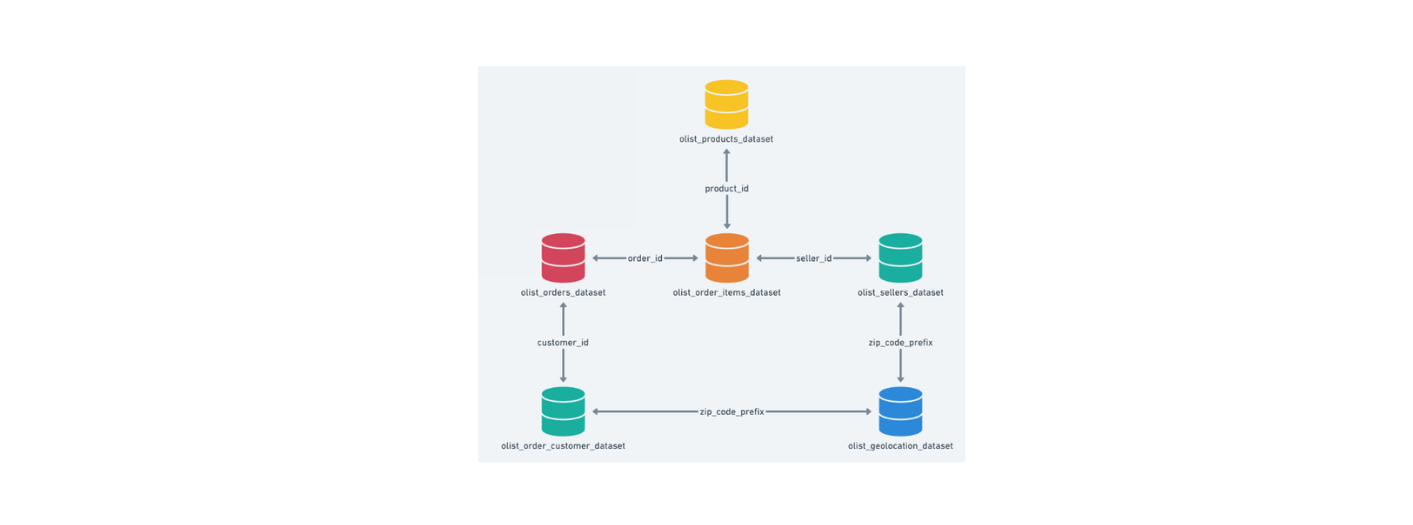






**Table 1: "olist_customer_dataset"**
This table contains customer_id informations along with their zip codes and city, state informations which shows location of customers

**Table 2: "olist_geolocation_dataset"** This table involves latitude, longitude, city and state information based on zip codes


**Table 3: "olist_order_items_dataset"** This table covers the each products purchased within the same order along with seller, price and shipment costs details.

**Table 4: "olist_order_dataset"** This table shows customer and date and time (delivered date, shipment date, order purchase date) information for each order.

**Table 5: "olist_products_dataset"** This table covers product information such as category name, weight, height,  length, width values.

**Table 6: "olist_sellers_dataset"** This table contains seller informations along with location informations


# **3.Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import warnings
warnings.filterwarnings('ignore')

# **4.Loading the Tables**

In [ ]:
df_customers=pd.read_csv("/content/olist_customers_dataset.csv")
df_geolocation=pd.read_csv("/content/olist_geolocation_dataset.csv")
df_order_items=pd.read_csv("/content/olist_order_items_dataset.csv")
df_orders=pd.read_csv("/content/olist_orders_dataset.csv")
df_products=pd.read_csv("/content/olist_products_dataset.csv")
df_sellers=pd.read_csv("/content/olist_sellers_dataset.csv")

# **5. Basic EDA Analysis and Preprocessing Data**




Head, tail , shape, missing value dedection, duplicated rows check and descriptive analysis will be reviewed.

The dataset has 6 different tables and each table are reviewed different sections.

## **5.1.Exploring of df_customers**

In [ ]:
print('Head 5 Examples of Customer Data : \n')
df_customers.head(5)

Head 5 Examples of Customer Data : 



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
print("Tail 5 Examples of Customer Data: \n")
df_customers.tail(5)

Tail 5 Examples of Customer Data: 



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [ ]:
#The rows and columns number
print("The shape of the customer table: ", df_customers.shape)

#Check duplicates
print("Duplicated rows number for customer dataset is: ", df_customers.duplicated().sum())

#Check missing values
print("The missing values of customer dataset: \n ")
df_customers.isnull().sum()

The shape of the customer table:  (99441, 5)
Duplicated rows number for customer dataset is:  0
The missing values of customer dataset: 
 


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0




> df_customers has no missing or duplicated values. It is not required to clean data.



In [ ]:
#Check data type for each columns
print("The data type of each columns of Customer table is: \n")
df_customers.info()

The data type of each columns of Customer table is: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB




> No descriptive analysis was performed for df_customers, Since it is a dimensional table that contains only descriptive information and no metrics.Performing descriptive analysis wouldn't provide much value on its own.


In [ ]:
#Rename the column of customer_zip_code_prefix increase readability
df_customers.rename(columns={"customer_zip_code_prefix":"zip_code"},inplace=True)

### **5.1.1. Mini Analysis; One Time Buyers vs Repeating Customers**



> For each order, new "customer_id" was defined to track that order.
> This indicates that the same customer will get different customer_id for different orders.

> To identify same customers "customer_unique_id" columns will be used. By using "customer_unique_id" we can calculate the number of orders by placed for each customer.




In [ ]:
# Calculate the number of total customers
total_customers = df_customers['customer_unique_id'].nunique()
print(f"Total number of customers: {total_customers} \n")

# Calculate number of distinct orders for each customer and rename the column
numberoforders_by_customers = df_customers.groupby("customer_unique_id")["customer_id"].nunique().reset_index()
numberoforders_by_customers.rename(columns={"customer_id":"number_of_orders"},inplace=True)

# Filter for customers with more than one order
customers_with_multipleorders = numberoforders_by_customers[numberoforders_by_customers["number_of_orders"] > 1]

# Calculate the number of customers with more than one order
num_customers_with_multiple_orders = len(customers_with_multipleorders)

onetimebuyers = numberoforders_by_customers[numberoforders_by_customers["number_of_orders"] == 1].shape[0]

print(f"Number of customers with more than one order: {num_customers_with_multiple_orders} \n")
print(f"Total number of one time buyer customers: {onetimebuyers} \n")
print("Number of orders for each customer: \n")
print(numberoforders_by_customers.sort_values(by="number_of_orders",ascending=False))

Total number of customers: 96096 

Number of customers with more than one order: 2997 

Total number of one time buyer customers: 93099 

Number of orders for each customer: 

                     customer_unique_id  number_of_orders
52973  8d50f5eadf50201ccdcedfb9e2ac8455                17
23472  3e43e6105506432c953e165fb2acf44c                 9
37797  6469f99c1f9dfae7733b25662e7f1782                 7
76082  ca77025e7201e3b30c44b472ff346268                 7
10354  1b6c7548a2a1f9037c1fd3ddfed95f33                 7
...                                 ...               ...
32508  5657dfebff5868c4dc7e8355fea865c4                 1
32507  5657596addb4d7b07b32cd330614bdf8                 1
32506  5656eb169546146caeab56c3ffc3d268                 1
32505  5656a8fabc8629ff96b2bc14f8c09a27                 1
96095  ffffd2657e2aad2907e67c3e9daecbeb                 1

[96096 rows x 2 columns]


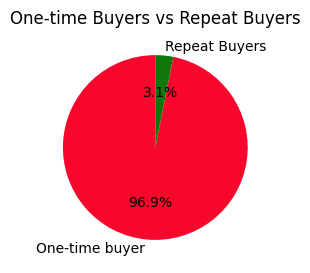

In [ ]:
#Visualize the one-time-buyers and repeat buyers

#Customer categorization such as "One Time Buyer" or "Repeat Buyer"
numberoforders_by_customers['customer_type'] = numberoforders_by_customers['number_of_orders'].apply(lambda x: 'One-time buyer' if x == 1 else 'Repeat Buyers')

#Get the distinct customer count for each group
customer_type_count = numberoforders_by_customers['customer_type'].value_counts()

#Visualization with Pie Chart
plt.figure(figsize=(3, 3))
plt.pie(customer_type_count.values, labels=customer_type_count.index, autopct='%1.1f%%', startangle=90, colors=['#f6072b','#10780a'])
plt.title('One-time Buyers vs Repeat Buyers')
plt.show()

**Reviews of Mini Analysis; One Time Buyers vs Repeating Customers**
> This outputs shows that significant amount of customers are one-time buyers with 96.9% rate and 3.1% of customers placed more than one orders.

>Based on these numbers; Customers do not order another products from Olist Market. This situation could indicate poor product and services or insufficent marketing operations.

> To solve this problem and make customers repeat purchase again; loyalty or reward programs can be published, marketing investment can be increased such as digital ads or email marketing to appeal one-time buyers with special offers.



## **5.2. Exploring of df_geolocations**

In [ ]:
print("Head 5 examples of Geolocation Data: \n")
df_geolocation.head(5)

Head 5 examples of Geolocation Data: 



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
print("Tail 5 examples of Geolocation Data: \n ")
df_geolocation.tail(5)

Tail 5 examples of Geolocation Data: 
 


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


In [ ]:
#The rows and columns number
print("The shape of the Geolocation table: ", df_geolocation.shape)

#Check duplicates
print("Duplicated rows number for Geolocation dataset is: ", df_geolocation.duplicated().sum())

#Check missing values
print("The missing values of Geolocation dataset: \n ")
df_geolocation.isnull().sum()

The shape of the Geolocation table:  (1000163, 5)
Duplicated rows number for Geolocation dataset is:  261831
The missing values of Geolocation dataset: 
 


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [ ]:
#Remove Duplicates;
print("Number of rows before removing duplicates are: ", df_geolocation.shape[0])
df_geolocation.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates are: ", df_geolocation.shape[0])

Number of rows before removing duplicates are:  1000163
Number of rows after removing duplicates are:  738332


In [ ]:
#Check data type for each columns
print("The data type of each columns of Geolocation table is: \n")
df_geolocation.info()

The data type of each columns of Geolocation table is: 

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [ ]:
#rename the columns;
df_geolocation.rename(columns={"geolocation_zip_code_prefix":"zip_code",
                               "geolocation_lat":"lat",
                               "geolocation_lng":"long"},inplace=True)

In [ ]:
#Checking of multiple location entries for the same zip code
df_geolocation.groupby("zip_code").value_counts().head(5)

zip_code  lat         long        geolocation_city  geolocation_state
1001      -23.551427  -46.634074  sao paulo         SP                   1
          -23.551337  -46.634027  sao paulo         SP                   1
          -23.549292  -46.633559  sao paulo         SP                   1
          -23.550642  -46.634410  sao paulo         SP                   1
          -23.550498  -46.634338  sao paulo         SP                   1
Name: count, dtype: int64

In [ ]:
#to handle these multiplication, average latitude and longtitude values are used
df_geolocation=df_geolocation.groupby("zip_code").agg({"lat":"mean","long":"mean"}).reset_index()

### **5.2.1. Combine df_customer and df_geolocation**

> df_customers and df_geolocation tables have common columns such as city, state, zip code. Latitude and Longitude informations will be added to df_customer dataframe by using "zip_code".

> First and foremost, I will check data discrepancy between two tables, based on the results two table will be merged.



In [ ]:
#Check whether each zip code in the df_customers matches with df_geolocation dataframe or not?
unmatched_rows= df_customers[~df_customers["zip_code"].isin(df_geolocation["zip_code"])]
print("How many orders do not have latitude and longtide information? ",unmatched_rows.shape[0])
print("How many customers do not have latitude and longitude information? ",unmatched_rows["customer_unique_id"].nunique())
print("Percentage of orders with missing location information compared to all orders.",
      f"{(unmatched_rows.shape[0]/df_customers['customer_id'].nunique())*100:.2f}%")
print("Percentage of customers with missing location information compared to all customers",
      f"{(unmatched_rows['customer_unique_id'].nunique()/df_customers['customer_unique_id'].nunique())*100:.2f}%")

How many orders do not have latitude and longtide information?  278
How many customers do not have latitude and longitude information?  269
Percentage of orders with missing location information compared to all orders. 0.28%
Percentage of customers with missing location information compared to all customers 0.28%


> There are 278 unmatched rows for 269 distinct customers. For those customers and orders we lack latitude and longtide information although we have state and city informations of them. The percentage is of these rows is negligible. (0.28%)

In [ ]:
#Merge tables
df_customers= pd.merge(df_customers, df_geolocation[["zip_code","lat","long"]], on='zip_code', how='left')

In [ ]:
#Checking duplication after merging
df_customers.duplicated().sum()

0

### **5.2.2. Mini Analysis; Customer Count, Order Count and Average Order Count based on Regions**

In [ ]:
print("Number of distinct customer states: ",df_customers["customer_state"].nunique())
print("Number of distinct customer cities: ",df_customers["customer_city"].nunique())

Number of distinct customer states:  27
Number of distinct customer cities:  4119


In [ ]:
#To understand the potential of each region, summary dataframe needs to be created
#This dataframe basically represent that distinct customer count, order count based on state and city
summary_geographic_base= df_customers.groupby(["customer_state","customer_city"]).agg({"customer_unique_id":"nunique",
                                                              "customer_id":"nunique"}).sort_values(by="customer_unique_id",ascending=False).reset_index()
#Rename the columns
summary_geographic_base.rename(columns={"customer_unique_id":"distinct_customer_count",
                                         "customer_id":"order_count"}, inplace=True)

#Average Order Count helps to understand customer behaiviors in the regions.
summary_geographic_base["average_order_count"]= summary_geographic_base["order_count"]/summary_geographic_base["distinct_customer_count"]

In [ ]:
summary_geographic_base.head()

,customer_state,customer_city,distinct_customer_count,order_count,average_order_count
0,SP,sao paulo,14984,15540,1.037106
1,RJ,rio de janeiro,6620,6882,1.039577
2,MG,belo horizonte,2672,2773,1.037799
3,DF,brasilia,2069,2131,1.029966
4,PR,curitiba,1465,1521,1.038225


In [ ]:
#Descriptive analysis of average_order_count to understand distributions of it.
summary_geographic_base["average_order_count"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
average_order_count,4310.0,1.029217,0.119549,1.0,1.0,1.0,1.0,3.0


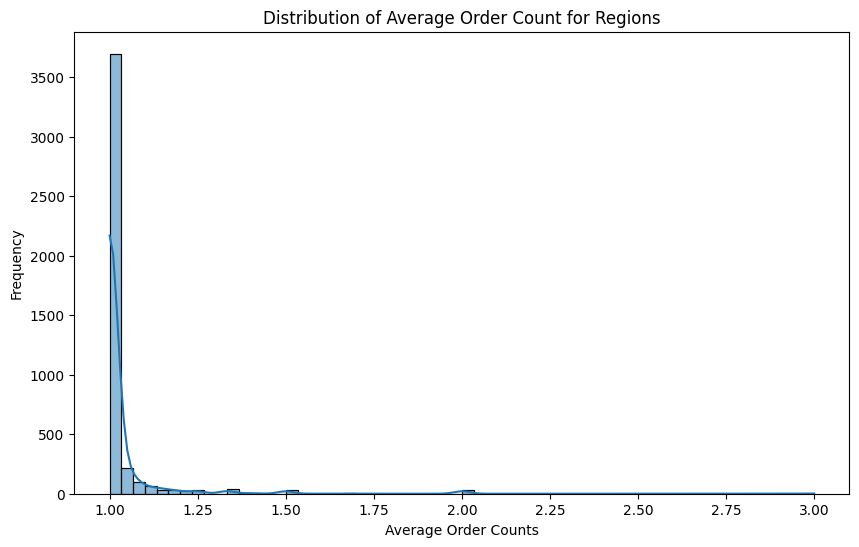

In [ ]:
#Put the distribution of average_order_count into histogram to see descriptive analysis deeply.
plt.figure(figsize=(10,6))
sns.histplot(summary_geographic_base["average_order_count"], bins=60, kde=True)
plt.title('Distribution of Average Order Count for Regions')
plt.xlabel('Average Order Counts')
plt.ylabel('Frequency')
plt.show()

> Based on descriptive analysis of "average_order_count" and histogram, several cities and states have only one distinct customer, and their average order count is 1. The fact that 75% of the regions have an average order count of 1. These regions has low customer engagement. These customers purchased products from Olist Market one time, and no repeat shopping.

>These cities and regions might represent locations where Olist hasn't effectively penetrated the market, customers have no information about the company or where demand for products is really low.


> Olist should focus on customer retention strategies to encourage repeat purchases, as most customers are only ordering once.





In [ ]:
#the cities are to be labeled based on average_order_count such as "One-Time Buyers", "Occasional Buyers", "Frequent Buyers"
#One-Time Buyers: average_order_count == 1, Cities/regions where customers place only a single order.
#Occasional Buyers: average_order count between 1 and 2; 1 < average_order_count <= 2, Cities/regions where customers place slightly more than one order, but not frequently.
#Frequent Buyers: the regions has average_order_count value more than 2, customers tend to make multiple purchases.

summary_geographic_base['city_category'] = summary_geographic_base['average_order_count'].apply(lambda x: 'One-Time Buyers' if x == 1
                                                 else 'Occasional Buyers' if 1 < x <= 2
                                                 else 'Frequent Buyers')

In [ ]:
print("Number of One-Time Buyers cities in the dataset: ",summary_geographic_base[summary_geographic_base["city_category"]=="One-Time Buyers"][["customer_city"]].drop_duplicates().shape[0])
print("Number of Occasional Buyers cities in the dataset: ",summary_geographic_base[summary_geographic_base["city_category"]=="Occasional Buyers"][["customer_city"]].drop_duplicates().shape[0])
print("Number of Frequent Buyers cities in the dataset: ",summary_geographic_base[summary_geographic_base["city_category"]=="Frequent Buyers"][["customer_city"]].drop_duplicates().shape[0])


Number of One-Time Buyers cities in the dataset:  3395
Number of Occasional Buyers cities in the dataset:  778
Number of Frequent Buyers cities in the dataset:  2


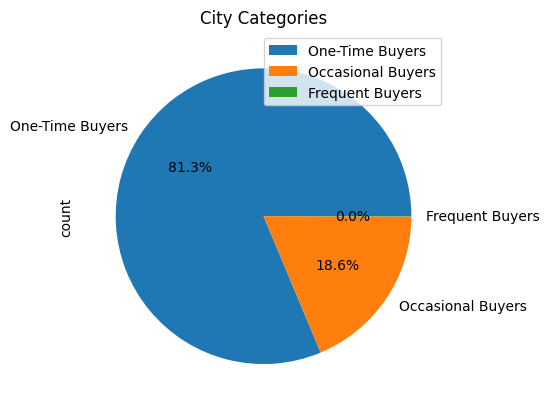

In [ ]:
df_pie = pd.DataFrame({'city_category': ["One-Time Buyers", "Occasional Buyers", "Frequent Buyers"],
                   'count': [summary_geographic_base[summary_geographic_base["city_category"]=="One-Time Buyers"][["customer_city"]].drop_duplicates().shape[0],
                            summary_geographic_base[summary_geographic_base["city_category"]=="Occasional Buyers"][["customer_city"]].drop_duplicates().shape[0],
                             summary_geographic_base[summary_geographic_base["city_category"]=="Frequent Buyers"][["customer_city"]].drop_duplicates().shape[0]]})

df_pie.plot.pie(y='count', labels=df_pie['city_category'], autopct='%1.1f%%')
plt.title('City Categories')
plt.show()

In [ ]:
print("One Time Buyers Cities: \n")
print(", ".join(summary_geographic_base[summary_geographic_base["city_category"]=="One-Time Buyers"]["customer_city"].values))

One Time Buyers Cities: 

criciuma, itabira, araxa, ilheus, pinhais, campina grande, petrolina, manhuacu, muriae, caruaru, jaguariuna, jatai, tupa, fernandopolis, matao, nova serrana, alvorada, uruguaiana, videira, lencois paulista, itupeva, juazeiro, passos, coronel fabriciano, paulista, esteio, sapucaia do sul, paulo afonso, sao miguel do oeste, cacador, pedro leopoldo, bom despacho, guanambi, nova odessa, olimpia, capao da canoa, campo largo, tiete, caldas novas, campo bom, sobral, itumbiara, luis eduardo magalhaes, paracambi, caucaia, juazeiro do norte, imbituba, formosa, japeri, taquaritinga, formiga, gramado, congonhas, ituverava, mirassol, alem paraiba, miguel pereira, garca, piumhii, dracena, mafra, farroupilha, corumba, valenca, itapolis, cambe, canoinhas, diamantina, rolandia, indaial, presidente venceslau, joacaba, santiago, frutal, brumadinho, altamira, biguacu, cachoeira paulista, tramandai, caceres, cornelio procopio, lucas do rio verde, trindade, cordeiro, tangara da ser

In [ ]:
print("Occasional Buyers Cities: \n")
print(", ".join(summary_geographic_base[summary_geographic_base["city_category"]=="Occasional Buyers"]["customer_city"].values))

Occasional Buyers Cities: 

sao paulo, rio de janeiro, belo horizonte, brasilia, curitiba, campinas, porto alegre, salvador, guarulhos, sao bernardo do campo, niteroi, santo andre, osasco, santos, goiania, sao jose dos campos, fortaleza, sorocaba, recife, jundiai, florianopolis, ribeirao preto, nova iguacu, belem, barueri, contagem, juiz de fora, sao goncalo, mogi das cruzes, uberlandia, vitoria, piracicaba, sao luis, sao jose do rio preto, vila velha, carapicuiba, campo grande, maua, londrina, praia grande, taboao da serra, serra, diadema, teresina, indaiatuba, sao caetano do sul, bauru, taubate, duque de caxias, maringa, joinville, cotia, maceio, cuiaba, joao pessoa, campos dos goytacazes, macae, sao carlos, volta redonda, suzano, americana, aracaju, petropolis, guaruja, caxias do sul, montes claros, natal, canoas, betim, marilia, jacarei, santa maria, blumenau, uberaba, limeira, pelotas, valinhos, sumare, santana de parnaiba, feira de santana, itapevi, ipatinga, sao jose, itaquaquec

In [ ]:
print("Frequent Buyers Cities: \n")
print(", ".join(summary_geographic_base[summary_geographic_base["city_category"]=="Frequent Buyers"]["customer_city"].values))

Frequent Buyers Cities: 

barra do tarrachil, rio maria


**One Time Buyers Cities;** %81.3 of the cities has a one-time buyer customer behaivior. Significant portion of the cities in this category. This category is promising. Olist should consider to publish new sales techniques and increase customer retention which resonates well with profitabilities in the future sales.

**Occasional Buyers Cities;** %18.6 of the cities has a occasional buyer customer behaivior(778 cities in the dataset).These cities have customers who have made a few purchases, but not enough to be considered frequent buyers. For these category Olist should aim to convert these customers into frequent buyers.


**Frequent Buyers Cities;** Frequent buyer cities account for only 2 cities in the dataset. These cities have customers who have made multiple purchases, they have a relatively strong relationship with the Olist.
Olist can focus on strategies that reward and engage loyal customer in order to maintain and grow the customer base in frequent buyer cities,

## **5.3. Exploring of df_products**

In [ ]:
print("Head 5 examples of Product Data: \n")
df_products.head(5)

Head 5 examples of Product Data: 



,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
print("Tail 5 examples of Product Data: \n ")
df_products.tail(5)

Tail 5 examples of Product Data: 
 


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


In [ ]:
#The rows and columns number
print("The shape of the Product table: ", df_products.shape)

#Check duplicates
print("Duplicated rows number for Product dataset is: ", df_products.duplicated().sum())

#Check missing values
print("The missing values of Product dataset: \n ")
df_products.isnull().sum()

The shape of the Product table:  (32951, 9)
Duplicated rows number for Product dataset is:  0
The missing values of Product dataset: 
 


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Handling with missing values;**

>product_name_lenght, product_description_lenght, product_photos_qty columns will not be used for analysis. These columns will be removed.

>product_category_name and the metrics related size of the products are important features.

> Size metrics; product_weight_g, product_length_cm, product_height_cm, product_width_cm have 2 rows missing values, these values will be fill with zero.

>For category_name; Based on its impacts on order table, this rows will be deleted or filled with values.

In [ ]:
#define product_id values for missing category_names
missing_products=df_products[df_products["product_category_name"].isnull()]["product_id"].reset_index()

In [ ]:
#calculate orders price for missing categories.
missing_categories_price=df_order_items[df_order_items["product_id"].isin(missing_products["product_id"])]["price"].sum()

#calculate total price regardless of product details.
total_price=df_order_items["price"].sum()

#calculate percentage of total sales
impact_of_missing = (missing_categories_price/total_price)*100
print("Percentage of total sales contributed by products that do not have a product category: "f"{impact_of_missing:.2f}%")

Percentage of total sales contributed by products that do not have a product category: 1.32%


The impact of null product categories (1.32 %) can be negligible. Null values will be replaced "Other" categories.


In [ ]:
#fill null values with "Others"
df_products["product_category_name"].fillna("Others",inplace=True)
df_products[["product_weight_g","product_length_cm","product_height_cm", "product_width_cm"]] = df_products[["product_weight_g","product_length_cm","product_height_cm", "product_width_cm"]].fillna(0)

In [ ]:
#drop unnecessary columns
df_products.drop(columns=["product_name_lenght","product_description_lenght","product_photos_qty"],inplace=True)

In [ ]:
#missing value check
df_products.isnull().sum()

,0
product_id,0
product_category_name,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_weight_g       32951 non-null  float64
 3   product_length_cm      32951 non-null  float64
 4   product_height_cm      32951 non-null  float64
 5   product_width_cm       32951 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [ ]:
#Check data type for each columns
print("The data type of each columns of product table is: \n")
df_products.info()

The data type of each columns of product table is: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_weight_g       32951 non-null  float64
 3   product_length_cm      32951 non-null  float64
 4   product_height_cm      32951 non-null  float64
 5   product_width_cm       32951 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


### **5.3.1. Mini Analysis: Measuring Category Variety**

The aim of this section is analyzed to the Olist Market's product categories variety.

What categories have the most different types of product?

In [ ]:
#create a summary dataframe to analyze category variety
category_summary= df_products.groupby("product_category_name").agg({"product_id":"count"}).rename(columns={"product_id":"count"}).reset_index()

In [ ]:
category_summary.sort_values(by="count",ascending=False,inplace=True)

In [ ]:
#mean value will be used to compare product variety
mean_of_product_count=category_summary['count'].mean()

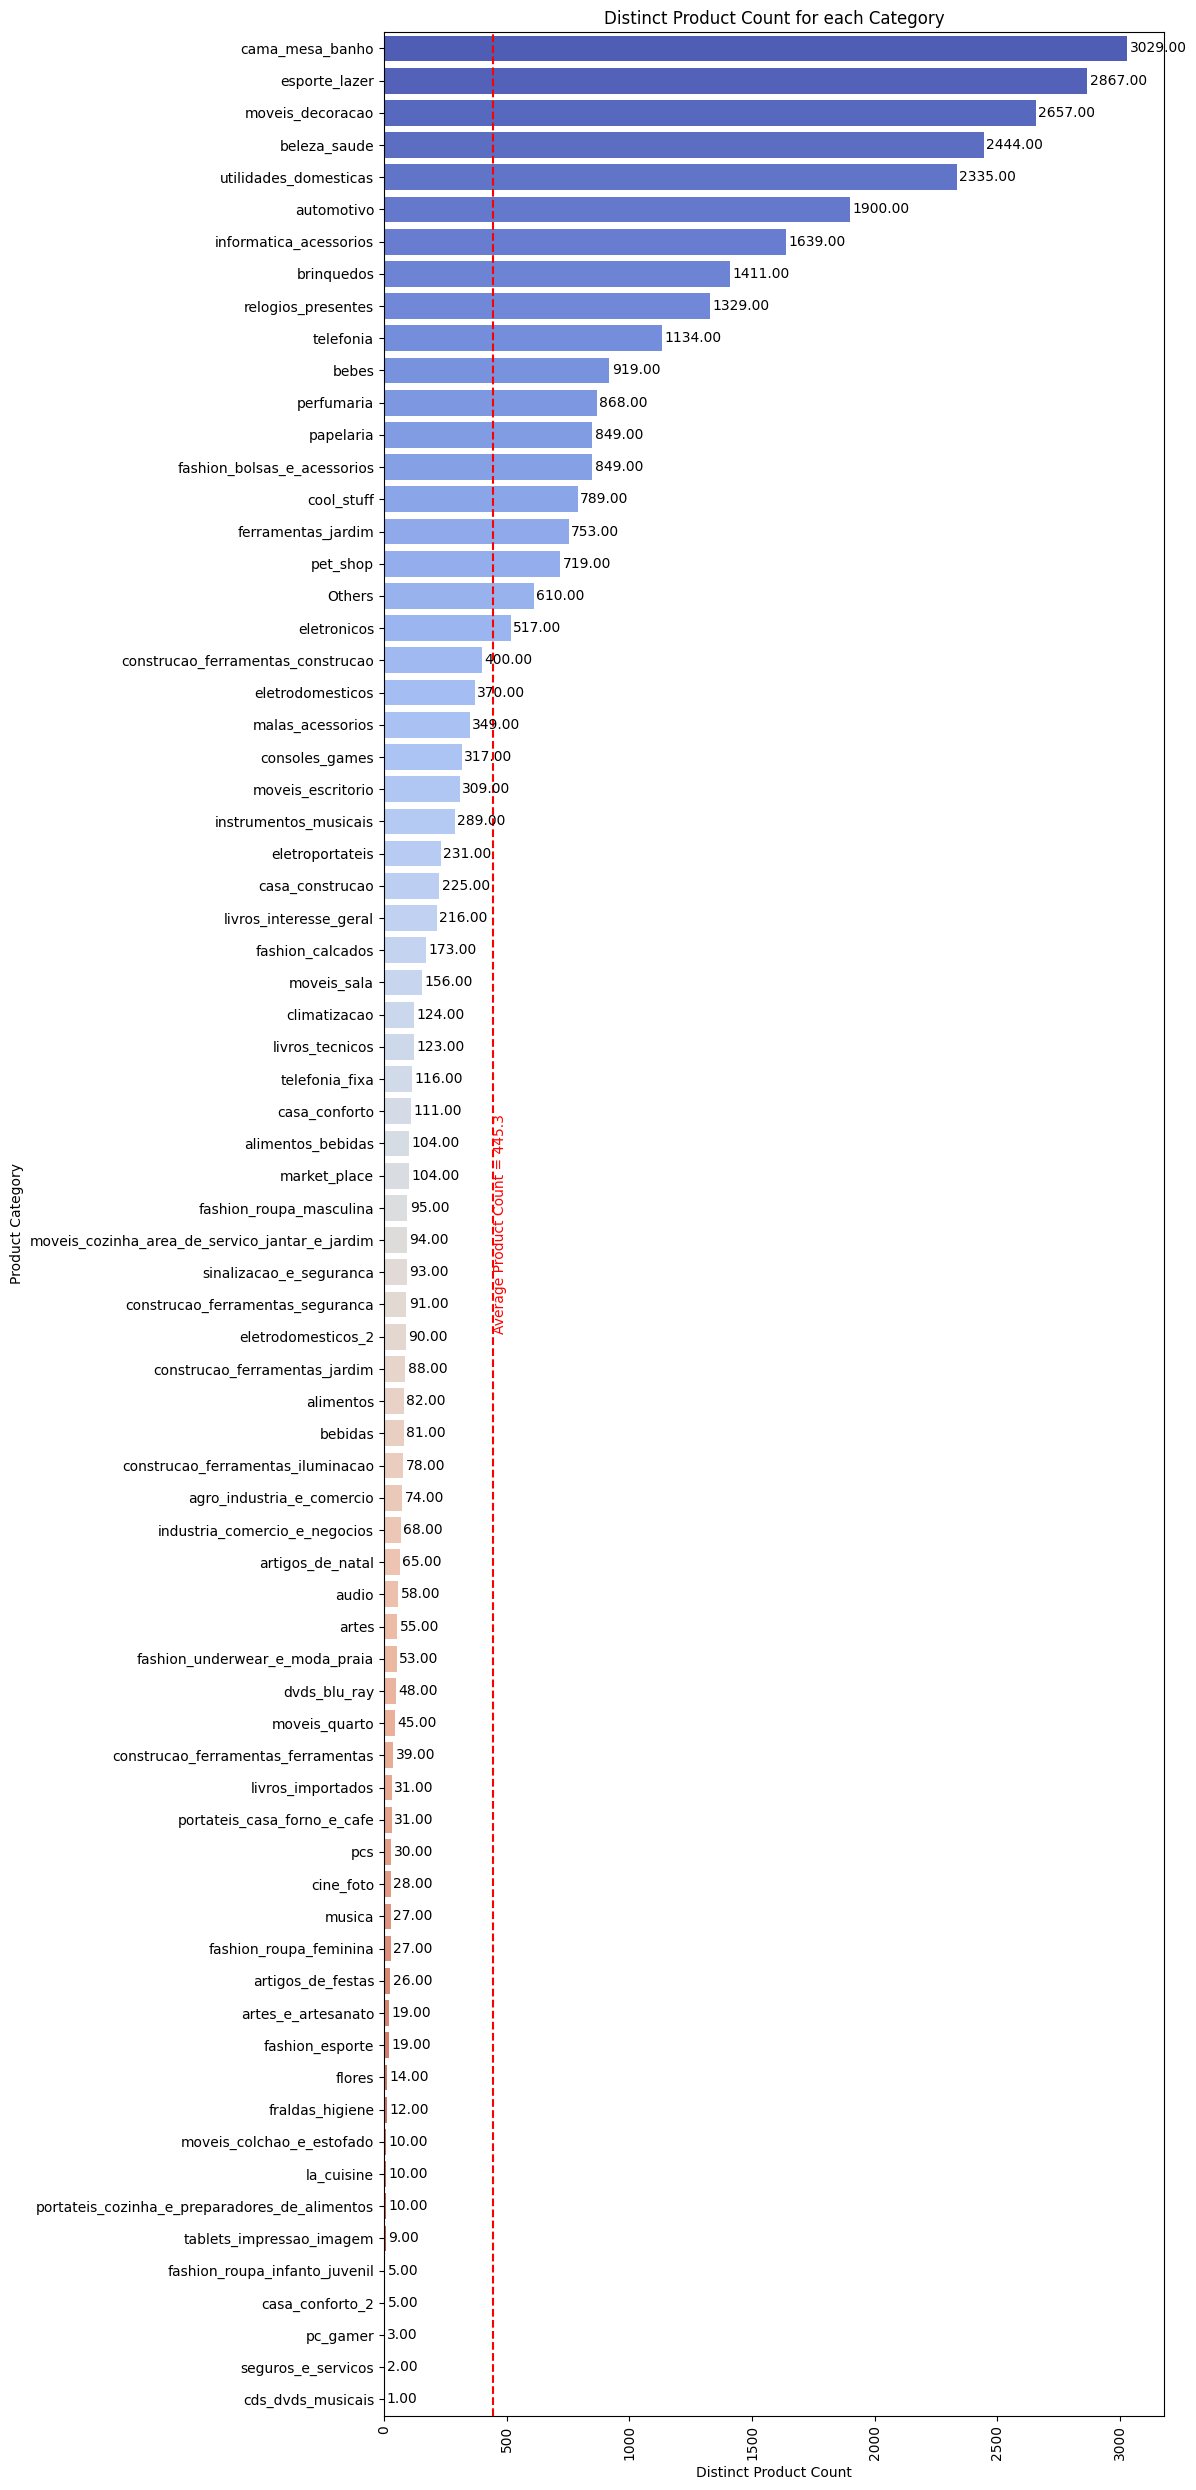

In [ ]:
plt.figure(figsize=(12, 25))
ax = sns.barplot(y="product_category_name", x="count", data=category_summary, palette="coolwarm")
plt.title("Distinct Product Count for each Category")
plt.xticks(rotation=90)
plt.xlabel("Distinct Product Count")
plt.ylabel("Product Category")

#Add constant line as vertically to show mean of the product number for comparison
ax.axvline(x=mean_of_product_count, label="Average Product Count", color="r", linestyle="--")

#I want to see mean value in the middle of the constatn line therefore I am gonna calculate the middle poit by getting minimum and maximum value of y axis
#Get the y-axis limits
yminimum_, ymaximum_ = ax.get_ylim()

#Calculate the midpoint of the y-axis range
y_middle_ = (yminimum_ + ymaximum_) / 2

#Annotate the mean value in the middle of the constant vertical line
ax.text(mean_of_product_count, y_middle_, f"Average Product Count = {mean_of_product_count:.1f}",
        color='r', fontsize=10, verticalalignment='center', horizontalalignment='left', rotation=90)

#Add Product Count Numbers as text on the bars
for p in ax.patches:
    width = p.get_width()
    y = p.get_y()
    if not isinstance(y, (int, float)):
        y = float(y)
    plt.text(width + 10, y + p.get_height() / 2, '{:.2f}'.format(width), ha="left", va="center")

plt.tight_layout()
plt.show()

In [ ]:
#List of the product categories has product variety more than average.
print("Product categories has product variety more than average: \n")
display(category_summary[category_summary["count"]>mean_of_product_count]["product_category_name"].to_list())

Product categories has product variety more than average: 



['cama_mesa_banho',
 'esporte_lazer',
 'moveis_decoracao',
 'beleza_saude',
 'utilidades_domesticas',
 'automotivo',
 'informatica_acessorios',
 'brinquedos',
 'relogios_presentes',
 'telefonia',
 'bebes',
 'perfumaria',
 'papelaria',
 'fashion_bolsas_e_acessorios',
 'cool_stuff',
 'ferramentas_jardim',
 'pet_shop',
 'Others',
 'eletronicos']

In [ ]:
#I want to see distinct total category name
print("Distinct category name count : ", category_summary["product_category_name"].nunique())

Distinct category name count :  74


> Olist offers different types of products to market and this is really hard to manage. It requires different perspectives, dealing with different sellers and each product requires different operational structure.


> Some product categories have wide range of products. Especially **cama_mesa_banho, esporte_lazer, moveis_decoracao, beleza_saude, utilidades_domesticas** product categories offer more then 2000 different product to the market. Olist can create competitive advantages through personolization for these categories. For those categories, Olist can make use of recommendation engines to promote this products efficiently. But the potentian risk of these categories is possibility of making customers confusing and leading to indesicion.



> Some categories have relatively less variety such as **cine_foto, musica, fashion_roupa_feminina** etc. (the value of distinct product count less than 30). By considering these categories sales, sales strategies such as sales with bundles or focus on product quality can be developed.



## **5.4. Exploring of df_sellers**

In [ ]:
print("Head 5 examples of sellers Data: \n")
df_sellers.head(5)

Head 5 examples of sellers Data: 



,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
print("Tail 5 examples of sellers Data: \n")
df_sellers.tail(5)

Tail 5 examples of sellers Data: 



,seller_id,seller_zip_code_prefix,seller_city,seller_state
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


In [ ]:
#The rows and columns number
print("The shape of the seller table: ", df_sellers.shape)

#Check duplicates
print("Duplicated rows number for seller dataset is: ", df_sellers.duplicated().sum())

#Check missing values
print("The missing values of seller dataset: \n ")
df_sellers.isnull().sum()

The shape of the seller table:  (3095, 4)
Duplicated rows number for seller dataset is:  0
The missing values of seller dataset: 
 


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


There is no need to clean this data.

In [ ]:
#Check data type for each columns
print("The data type of each columns of seller table is: \n")
df_sellers.info()

The data type of each columns of seller table is: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
#change the name of columns to increase readability
df_sellers.rename(columns={"seller_zip_code_prefix":"zip_code"},inplace=True)

### **5.4.1. Pulling Latitude and Longitude Informations from df_geolocations**

In [ ]:
#df_geolocation and df_Sellers will be joined using zip_code column.
#First things to do is checking zipcode mismatch situations
#Are there any zipcodes that are in df_sellers but not in df_geolocation
zipcode_mismatch= df_sellers[~df_sellers["zip_code"].isin(df_geolocation["zip_code"])]
print("The number of mismatching zipcodes: ", zipcode_mismatch.shape[0])
print("Percentage of mismatching zipcodes compared to all zipcodes: " ,f"{(zipcode_mismatch['zip_code'].nunique()/df_sellers['zip_code'].nunique())*100:.2f}%")

The number of mismatching zipcodes:  7
Percentage of mismatching zipcodes compared to all zipcodes:  0.31%


In [ ]:
#As the percentage rate of mismatching rows is 0.31%, these rows are ignored
df_sellers= pd.merge(df_sellers, df_geolocation[["zip_code","lat","long"]], on='zip_code', how='left')

In [ ]:
#Check duplication after merge
df_sellers.duplicated().sum()

0

### **5.4.2. Mini Analysis: Seller Locations vs Customers Locations**

In [ ]:
#Summary
print("Number of distinct sellers: ",df_sellers["seller_id"].nunique())
print("Number of distinct seller states: ",df_sellers["seller_state"].nunique())
print("Number of distinct seller cities: ",df_sellers["seller_city"].nunique())
summary_seller=df_sellers.groupby("seller_state").agg({"seller_id":"nunique"}).sort_values(by="seller_id",ascending=False).reset_index()

Number of distinct sellers:  3095
Number of distinct seller states:  23
Number of distinct seller cities:  611


> Based on earlier findings, from Exploring of df_customer & df_geolocation sections, We can tell that Olist has 96096 different customers and those customers live in 27 different states and 4119 different cities which indicates that there are states and cities that Olist has customer but not has sellers.


In [ ]:
#determine cities and states where does not have sellers.
noseller_states= df_customers[~df_customers["customer_state"].isin(df_sellers["seller_state"])][["customer_state"]].drop_duplicates()
noseller_cities= df_customers[~df_customers["customer_city"].isin(df_sellers["seller_city"])][["customer_state","customer_city"]].drop_duplicates()

In [ ]:
print("Number of states that Olist has customers but not has sellers: ",noseller_states.shape[0])
print("List of the states that Olist has customers but not has sellers:")
print(noseller_states["customer_state"].to_list())

print("Number of cities that Olist has customers but not has sellers: ",noseller_cities["customer_city"].nunique())
print("List of the cities that Olist has customers but not has sellers:")
print(", ".join(noseller_cities["customer_city"].to_list()))

Number of states that Olist has customers but not has sellers:  4
List of the states that Olist has customers but not has sellers:
['AP', 'AL', 'TO', 'RR']
Number of cities that Olist has customers but not has sellers:  3585
List of the cities that Olist has customers but not has sellers:
pacaja, camacari, santa barbara, ituiutaba, taquarituba, parati, dourados, trindade, cacapava, botelhos, areia branca, itajuba, cruz das almas, sobral, paulista, bom principio, astolfo dutra, cabo frio, cafeara, nova bassano, barra do garcas, embu, urussanga, silvianopolis, gameleiras, belem, piracaia, feliz, moncoes, vargem grande, rio brilhante, eugenopolis, cidreira, santiago, sao sepe, alta floresta, jaboatao dos guararapes, ibatiba, saudades, macapa, salto de pirapora, bom jesus, santa cruz do rio pardo, santa ines, serrinha, itatiaia, varre-sai, mangaratiba, maceio, jaguariaiva, pindamonhangaba, ribeira, limoeiro, espigao do oeste, itanhaem, vinhedo, aripuana, guaratinga, ponta pora, matipo, dia

In [ ]:
#Discover the potential of these states by using customer count, order count and average order count.
customer_summary=df_customers.groupby(["customer_state"]).agg({"customer_unique_id":"nunique",
                                              "customer_id":"nunique"}).sort_values(by="customer_unique_id",ascending=False).reset_index()
customer_summary.rename(columns={"customer_unique_id":"distinct_customer_count",
                                         "customer_id":"order_count"}, inplace=True)
customer_summary["average_order_count"]= customer_summary["order_count"]/customer_summary["distinct_customer_count"]

In [ ]:
#The list of states that Olist has no seller but sales.
customer_summary[customer_summary["customer_state"].isin(noseller_states["customer_state"])]

,customer_state,distinct_customer_count,order_count,average_order_count
19,AL,401,413,1.029925
21,TO,273,280,1.025641
25,AP,67,68,1.014925
26,RR,45,46,1.022222


> Olist has a potential customer base in the following regions; AL, TO, AP, RR. Having a seller in these states can significantly increase the sales amount, expend customer base and reduce shippment costs and delivery time can be shortened by improving operational efficiency.


In [ ]:
#Discover the potential of cities where have no seller by using customer count, order count and average order count.
customer_summary_city=df_customers.groupby(["customer_city"]).agg({"customer_unique_id":"nunique",
                                              "customer_id":"nunique"}).sort_values(by="customer_unique_id",ascending=False).reset_index()
customer_summary_city.rename(columns={"customer_unique_id":"distinct_customer_count",
                                         "customer_id":"order_count"}, inplace=True)
customer_summary_city["average_order_count"]= customer_summary_city["order_count"]/customer_summary_city["distinct_customer_count"]

In [ ]:
#List of the cities that do not have seller
print("Cities has no sellers but sales: \n")
potential_cities=customer_summary_city[customer_summary_city["customer_city"].isin(noseller_cities["customer_city"])].sort_values(by="order_count",ascending=False)
potential_cities[potential_cities["order_count"]>50]

Cities has no sellers but sales: 



,customer_city,distinct_customer_count,order_count,average_order_count
22,belem,435,447,1.027586
52,maceio,243,247,1.016461
101,rio das ostras,135,137,1.014815
103,jaboatao dos guararapes,134,135,1.007463
117,cabo frio,116,117,1.008621
120,passo fundo,112,113,1.008929
124,gravatai,108,112,1.037037
123,palmas,108,110,1.018519
142,pindamonhangaba,96,101,1.052083
137,santa luzia,98,100,1.020408


Especially **Belem** has a strong potential customer base. Moreover, several cities show pattern of repeat customer based on average order count. Enhancing seller presence in these cities could enhance this relatively royal customer base, increase sales and improving long-term customer retention.

## **5.5. Exploring of Order DataFrames**

###**5.5.1. Exploring df_orders**

In [ ]:
print("Head 5 examples of orders data: \n")
df_orders.head(5)

Head 5 examples of orders data: 



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
print("Tail 5 examples of orders data: \n")
df_orders.head(5)

Tail 5 examples of orders data: 



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
#The rows and columns number
print("The shape of the order table: ", df_orders.shape)

#Check duplicates
print("Duplicated rows number for order dataset is: ", df_orders.duplicated().sum())

#Check missing values
print("The missing values of order dataset: \n ")
df_orders.isnull().sum()

The shape of the order table:  (99441, 8)
Duplicated rows number for order dataset is:  0
The missing values of order dataset: 
 


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


**Dealing with missing value**

As "order_approved_at", "order_delivered_carrier_date" will not be used in further analysis, they will be dropped.

In further analysis will be carried out for only "delivered" orders. Therefore, rows from other order status will be deleted.

In [ ]:
#check the order status value first for missing "order_delivered_customer_date". Based on order status value I will decide whether remove missing rows or not.
df_orders[df_orders["order_delivered_customer_date"].isnull()]["order_status"].value_counts()

,count
order_status,
shipped,1107
canceled,619
unavailable,609
invoiced,314
processing,301
delivered,8
created,5
approved,2


In [ ]:
#In this notebook I will focus on only "delivered" orders. For the other types it is too normal to not have order_delivered_customer_date
#I will drop rows which order status is not equal to "delivered"
df_orders=df_orders[df_orders["order_status"]=="delivered"]

In [ ]:
#fill the missing delivered times with estimated delivery date (only 8 rows are missing)
df_orders["order_delivered_customer_date"].fillna(df_orders["order_estimated_delivery_date"],inplace=True)

In [ ]:
#Remove unnecessary columns
df_orders.drop(columns=["order_approved_at","order_delivered_carrier_date","order_estimated_delivery_date"],inplace=True)

In [ ]:
#Check missing rows again.
print("Missing rows number for order dataset is: ", df_orders.isnull().sum())

Missing rows number for order dataset is:  order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
dtype: int64


### **5.5.2. Exploring df_order_items**

In [ ]:
print("Head 5 examples of orders items data: \n")
df_order_items.head(5)

Head 5 examples of orders items data: 



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
print("Tail 5 examples of orders items data: \n")
df_order_items.tail(5)

Tail 5 examples of orders items data: 



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [ ]:
#The rows and columns number
print("The shape of the order items table: ", df_order_items.shape)

#Check duplicates
print("Duplicated rows number for order items dataset is: ", df_order_items.duplicated().sum())
#Check missing values
print("The missing values of order items dataset: \n ")
df_order_items.isnull().sum()

The shape of the order items table:  (112650, 7)
Duplicated rows number for order items dataset is:  0
The missing values of order items dataset: 
 


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
#remove unnecessary column
df_order_items.drop(columns=["shipping_limit_date","order_item_id"],inplace=True)

The order items dataframe has no missing or duplicated values, therefore, there is no needed to cleaning dataframe.

### **5.5.3. Combining df_orders and df_order_items**

>df_orders has order id, customer id, date and time information of order

>df_order_items has order id, product id and seller id and values of orders such as shipment cost and price

>By merging two order dataframes, I aim to consolidate all information into one dataframe.

>Before merging two dataframe, first order_item_id dataframe will be summarized and total order value will be calculated based on freight and price of each product.

In [ ]:
#get backups
df_orders_backup=df_orders.copy()
df_order_items_backup=df_order_items.copy()

In [ ]:
#create an item column to calculate how many products were bought
df_order_items["item"] = df_order_items.groupby(['order_id', 'product_id'])['product_id'].transform('size')

In [ ]:
#For each order and different product there will be only one row on the order dataframe
df_order_items= df_order_items.drop_duplicates().reset_index()

In [ ]:
#Rename the columns
df_order_items=df_order_items.rename(columns={"price":"Unit_Price", "freight_value":"Freight_Value", "item":"Total_Item"})

In [ ]:
#Total Price are calculated each product's price multiplied by total item.
df_order_items['Total_Price'] = df_order_items ["Unit_Price"] *df_order_items ["Total_Item"]
#Total Value of the order equals to summation of Total Price and Shipment Value.
#The total order value (product + freight)
df_order_items['Total_Order_Value'] = df_order_items["Total_Price"] + df_order_items["Freight_Value"]
#At the end we have a df_order_items represents total price, unit price, freight value, total item number and total order value based on product, seller and order id.

In [ ]:
#remove index columns
df_order_items = df_order_items.drop(["index"],axis=1)

In [ ]:
#Check if there are mismatched order id between df_order and df_order_items

# Merge customer_id into df_order_items
df_order_details = df_order_items.merge(df_orders[["order_id", "customer_id"]], on="order_id", how="left")

#Check if all order_ids in df_order_items have a match in df_orders
missing_order_ids_in_orders = df_order_details[df_order_details['customer_id'].isnull()]

if not missing_order_ids_in_orders.empty:
    print("These order_id are in the df_order_items do not have a matching order in df_orders:")
    print(missing_order_ids_in_orders[['order_id']])
else:
    print("All order_id are in the df_order_items are matched in df_orders.")

#Check if all order_ids in df_orders have a match in df_order_items
missing_order_ids_in_order_items = df_orders[~df_orders['order_id'].isin(df_order_items['order_id'])]

if not missing_order_ids_in_order_items.empty:
    print("\nThese order_id are in the df_orders do not have a matching entry in df_order_items:")
    print(missing_order_ids_in_order_items[['order_id']])
else:
    print("\nAll order_id are in the df_orders have matching entries in df_order_items.")

# Resulting DataFrame with customer_id added
print("\nMerged df_order_details:")
print(df_order_details)

These order_id are in the df_order_items do not have a matching order in df_orders:
                                order_id
72      002f19a65a2ddd70a090297872e6d64e
77      00310b0c75bb13015ec4d82d341865a4
239     00a99c50fdff7e36262caba33821875a
249     00ae7a8b4936674ebb701d4a23719a79
382     00ff0cf5583758e6964723e42f111bf4
...                                  ...
102019  feebdfdb4759bd4600d52547c81b4fa8
102061  ff0768e3356919b32e3d7f30baecfcfb
102136  ff358345576214cc9e08488188973c84
102178  ff536d93ae4214b4d51c2894ccfc569f
102214  ff7140ba310a4717112d39c0cd0b4062

[2229 rows x 1 columns]

All order_id are in the df_orders have matching entries in df_order_items.

Merged df_order_details:
                                order_id                        product_id  \
0       00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1       00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2       000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbee

In [ ]:
#These order_id have no equivilant order_id in df_orders dataframe.
#For that reason, these order_id has no customer_id, order_date informations.
missing_order_ids_in_orders.head(5)

,order_id,product_id,seller_id,Unit_Price,Freight_Value,Total_Item,Total_Price,Total_Order_Value,customer_id
72,002f19a65a2ddd70a090297872e6d64e,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,53.98,23.31,1,53.98,77.29,NaN
77,00310b0c75bb13015ec4d82d341865a4,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,39.90,15.38,1,39.90,55.28,NaN
239,00a99c50fdff7e36262caba33821875a,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,52.99,22.30,1,52.99,75.29,NaN
249,00ae7a8b4936674ebb701d4a23719a79,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,27.90,9.26,1,27.90,37.16,NaN
382,00ff0cf5583758e6964723e42f111bf4,bb1fe952bdc16ef8974d4ca11aec19b7,b17b679f4f5ce2e03ce6968c62648246,154.90,15.25,1,154.90,170.15,NaN


In [ ]:
#Ratio of missing_order_id sales to all sales
missing_order_ratio= (missing_order_ids_in_orders["Total_Order_Value"].sum() / df_order_items["Total_Order_Value"].sum())*100
print("Ratio of missing_order_id sales to all sales: ",f"{missing_order_ratio:.2f}%")

Ratio of missing_order_id sales to all sales:  2.68%


> To sum up; There are some order_id which exist in df_order_items but not in df_orders dataframe. For these unmatching order_id's unfortunately, there are no customer information, order date and delivering day informations. These informations cannot be filled with any prediction method. Additionally, The ratio of these unmatching orders to all orders is 2.68%, which is not that high. Because of all the reasons just listed, these orders will not take place in the final, merged, order dataframe.



In [ ]:
#Merged two dataframe and create final dataframe.
df_final_orders= pd.merge(df_order_items, df_orders[['order_id', 'customer_id', "order_purchase_timestamp","order_delivered_customer_date"]], on='order_id', how='inner')

# **Business Questions**

## **Question 1: Sales Trend Analysis**

**Question:** How sales trends developed over time? Are there any seasonal patterns?


> Order date and sales values (quantity, order count, revenu) will be used to detect a seosonality.

>First step is to create new dataframe which includes date and sales values.

In [ ]:
#Drop columns that will not be used
trend_analysis=df_final_orders.drop(columns=["product_id","seller_id","order_delivered_customer_date"])

In [ ]:
#Create Date, Year, Month columns to use in time based analysis accurately.
#Convert the order purchase timestamp to a datetime
trend_analysis['order_purchase_timestamp'] = pd.to_datetime(trend_analysis['order_purchase_timestamp'])
trend_analysis['order_year'] = trend_analysis['order_purchase_timestamp'].dt.year
trend_analysis['order_month'] = trend_analysis['order_purchase_timestamp'].dt.month
trend_analysis['order_purchase_date'] = pd.to_datetime(trend_analysis['order_purchase_timestamp']).dt.date

In [ ]:
#Determining the date range to be analyzed
#Create new dataframe represents how many orders take place in a month and how many days have order records
date_check=trend_analysis.groupby(["order_year","order_month"]).agg({"order_id":"count",
                                                           "order_purchase_date":"nunique"}
                                                          ).reset_index().sort_values(by=["order_year", "order_month"], ascending=True)

In [ ]:
#List of months with less than 26 days order record.
#These records will be deleted because they break constant order line
date_check[date_check["order_purchase_date"]<26]

,order_year,order_month,order_id,order_purchase_date
0,2016,9,1,1
1,2016,10,279,8
2,2016,12,1,1


In [ ]:
#Remove rows from 2016.
trend_analysis= trend_analysis[~(trend_analysis['order_year'] == 2016)]

**KPI list to measure monthly sales;**
* **Total Order Value**: How much money generated?
* **Distinct Order Count**: How many orders did take place?
* **Average Order Value**: What is the average revenue per order?
* **Daily Average Value**: What is the average revenue per day?
* **Total Order Value Growth by Previous Month** : What is the growth rate compared to previous month?
* **Order Count Growth by Previous Month**:  What is the growth rate compared to previous month?
* **Average Order Value Growth by Previous Month** :  What is the growth rate compared to previous month?
* **Daily Average Value Growth by Previous Month** :  What is the growth rate compared to previous month?



In [ ]:
#Create a summary dataframe along with KPI's to analyze data deeply
monthly_summary= trend_analysis.groupby(['order_year', 'order_month']).agg({"Total_Order_Value":"sum",
                                                  "order_id":"nunique",
                                                   "order_purchase_date":"nunique"
                                                  }).reset_index()
monthly_summary["Avreage_Order_Value"]=monthly_summary["Total_Order_Value"]/monthly_summary["order_id"]
monthly_summary["Daily_Average_Value"]=monthly_summary["Total_Order_Value"]/monthly_summary["order_purchase_date"]
monthly_summary["TOV_Growth_PM"]=monthly_summary['Total_Order_Value'].pct_change() * 100
monthly_summary["OrderCount_Growth_PM"]=monthly_summary['order_id'].pct_change() * 100
monthly_summary["AOV_Growth_PM"]=monthly_summary['Avreage_Order_Value'].pct_change() * 100
monthly_summary["DAV_Growth_PM"]=monthly_summary['Daily_Average_Value'].pct_change() * 100

In [ ]:
#rename columns
monthly_summary.rename(columns={"order_id":"Order_Count",
                                "order_purchase_date":"Day Count"},inplace=True)

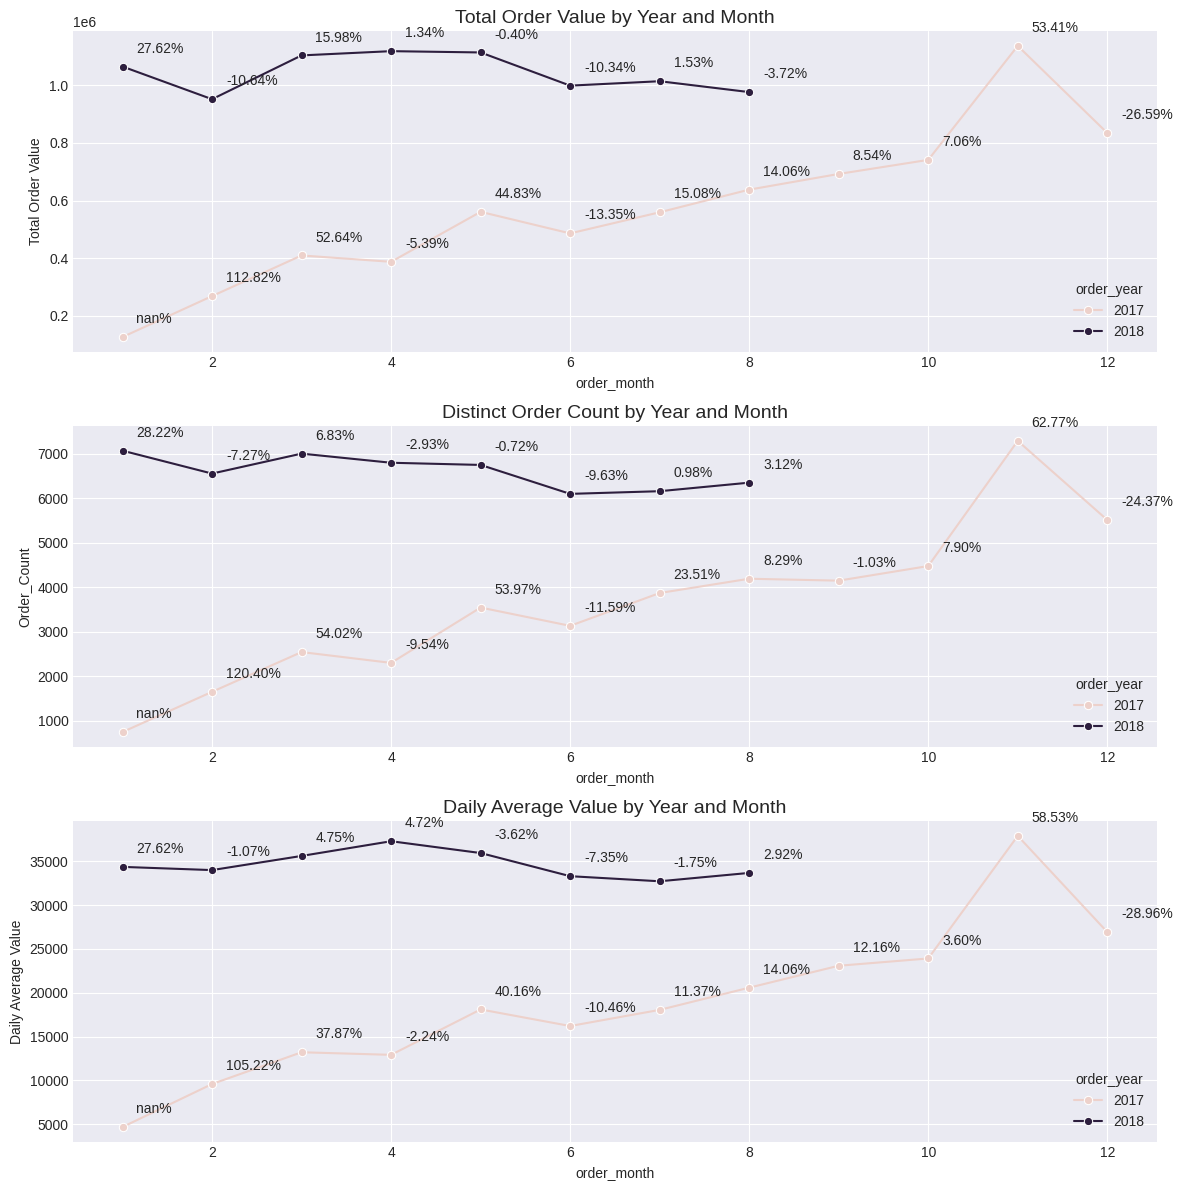

In [ ]:
#Visualize the output
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

#Plot Total Order Value over time
sns.lineplot(data=monthly_summary, x='order_month', y='Total_Order_Value', hue='order_year', marker='o', ax=ax[0])
ax[0].set_title('Total Order Value by Year and Month', fontsize=14)
ax[0].set_ylabel('Total Order Value')

#Annotate TOV_Growth_PM for each month
for i, row in monthly_summary.iterrows():
    ax[0].annotate(f'{row["TOV_Growth_PM"]:.2f}%',
                 xy=(row['order_month'], row['Total_Order_Value']),
                 xytext=(10, 10), textcoords='offset points')


#Plot Growth for Total Order Value over time
sns.lineplot(data=monthly_summary, x='order_month', y='Order_Count', hue='order_year', marker='o', ax=ax[1])
ax[1].set_title('Distinct Order Count by Year and Month', fontsize=14)
ax[1].set_ylabel('Order_Count')

#annotate Order_Value_Growth for each month
for i, row in monthly_summary.iterrows():
    ax[1].annotate(f'{row["OrderCount_Growth_PM"]:.2f}%',
                 xy=(row['order_month'], row['Order_Count']),
                 xytext=(10, 10), textcoords='offset points')

#Plot Daily Average Value over time
sns.lineplot(data=monthly_summary, x='order_month', y='Daily_Average_Value', hue='order_year', marker='o', ax=ax[2])
ax[2].set_title('Daily Average Value by Year and Month', fontsize=14)
ax[2].set_ylabel('Daily Average Value')

#Annotate DAV_Growth for each month
for i, row in monthly_summary.iterrows():
    ax[2].annotate(f'{row["DAV_Growth_PM"]:.2f}%',
                 xy=(row['order_month'], row['Daily_Average_Value']),
                 xytext=(10, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


### **Observations**

> The graphs clearly shows a significant increase in sales from 2017 to 2018 in all metrics. It’s crucial to maintain this momentum by continuing to invest in marketing, sales and operation optimization strategies.

> **Peak Periods:** It is clear that November is the strongest month, probably due to Black Friday. Additionally, March has also a notable peak.
2018 January sales shows positive growth compared to last year's December.

> **Slower Periods:** June, July, and December show slower growth or declines. For these months, marketing campaign should be prioritized to prevent sales decrease.

> November 2017 has a significant boost in the three line charts, indicating a high seasonal demand due to Black Friday or other promotions. Total Order Value growth is 53.41%, Order Count growth is 62.77% and Daily Average Value growth is 58.53% from October to November 2018.

>There is a sharp decline from November to December. December 2017 see a -26.59 % drop in Total Order Value indicating the market reach a short term saturation after November discounts. Offering promotions beyond Black Friday might help reduce the steep decline and increase sales.

>2018 January has 27.62% decrease in Total Order Value compared to last year's December, suggesting that the New Year holiday shopping season over in December but increase emerges in January again.


>Three metrics(Total Average Value, Daily Average Value, Order Count) along with growth rates increase through early spring (March 2018 has a 15.97% increase), but this growth is getting slow in April and May.


## **Question 2: Delivery Performance Analysis**

**Question**: What is the average elapsed time from order placement time to delivery in different regions? Are there regions or sellers where delivery times are mostly longer?


Customer Regions, Seller Regions, Order Purchase Date, Order Delivered Date will be used for this analysis.

First step is create a summary dataframe to use during analyzing and visualizing the data.

In [ ]:
#Get customer location information from customer table
summary_df= df_final_orders[["order_id","seller_id","customer_id","order_purchase_timestamp","order_delivered_customer_date"]].merge(df_customers[["customer_id","customer_state","customer_city","lat","long"]],on="customer_id",how="inner")

In [ ]:
#Get seller location information from seller dataframe
summary_df=summary_df.merge(df_sellers[["seller_city","seller_state","lat","long","seller_id"]],on="seller_id",how="inner")

In [ ]:
#adjust date columns
summary_df["order_purchase_timestamp"]=pd.to_datetime(summary_df["order_purchase_timestamp"])
summary_df["order_delivered_customer_date"]=pd.to_datetime(summary_df["order_delivered_customer_date"])

In [ ]:
#rename columns
summary_df.rename(columns=({"order_purchase_timestamp":"order_date",
                            "order_delivered_customer_date":"delivered_date",
                            "lat_x":"lat_customer",
                            "long_x":"long_customer",
                            "lat_y":"lat_seller",
                            "long_y":"long_seller"}),inplace=True)

In [ ]:
#calculate the date difference between order date and delivered date
summary_df['duration'] = (summary_df['delivered_date'] - summary_df['order_date']).dt.days

In [ ]:
#Calculate the distance between Customer and Seller.
#Haversine formula will be used to calculate the distance between two differen locations.
def haversine(lat1, lon1, lat2, lon2):
    # Radius of Earth in kilometers
    R = 6371.0

    #Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    #Calculate differences between latitudes and longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    #application of Haversine formula
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    #Final results of distance in kilometers
    distance = R * c
    return distance

#appylying the haversine function to each row in 'order' dataframe
summary_df['distance_km'] = summary_df.apply(lambda row: haversine(row['lat_seller'], row['long_seller'], row['lat_customer'], row['long_customer']), axis=1)


In [ ]:
summary_df.describe().T

,count,mean,min,25%,50%,75%,max,std
order_date,100196,2018-01-02 00:12:45.685346816,2016-09-15 12:16:38,2017-09-14 09:43:54,2018-01-20 16:05:14,2018-05-05 21:13:03,2018-08-29 15:00:37,NaN
delivered_date,100196,2018-01-14 12:08:05.013922560,2016-10-11 13:46:32,2017-09-25 22:09:25.750000128,2018-02-02 16:10:59,2018-05-15 23:43:31.750000128,2018-10-17 13:22:46,NaN
lat_customer,99923.0,-21.209269,-33.68989,-23.589818,-22.924854,-20.140471,42.184003,5.58646
long_customer,99923.0,-46.193359,-72.668821,-48.109939,-46.632901,-43.635549,-8.723762,4.046468
lat_seller,99974.0,-22.794055,-32.075303,-23.612499,-23.418614,-21.757225,-2.503158,2.737096
long_seller,99974.0,-47.235207,-63.893789,-48.829541,-46.756262,-46.522432,-34.855831,2.342643
duration,100196.0,12.031688,0.0,6.0,10.0,15.0,209.0,9.532105
distance_km,99702.0,599.393229,0.0,187.44035,433.534818,796.723858,8677.917816,591.676721


<Axes: xlabel='duration', ylabel='Count'>

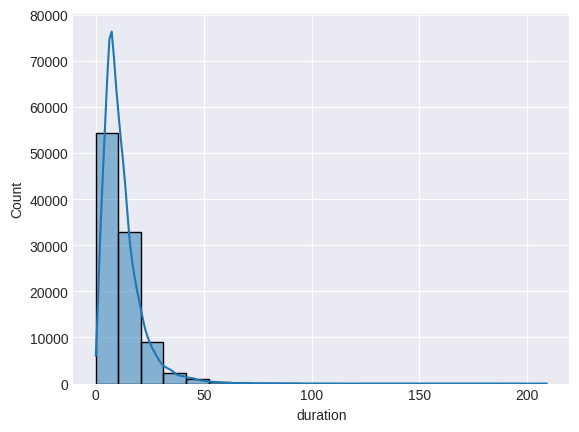

In [ ]:
#To analyze the distribution of duration.
sns.histplot(summary_df['duration'], bins=20, kde=True)

Based on histogram and desriptive analysis;
> The mean delivery duration is about 12 days, with a wide range (from 0 to 209 days). This also indicates that there are possible outliers.

> The mean distance between customers and sellers is roughly 599 km, ranging from 0 km to over 8,600 km.

>The standard deviation for both duration and distance_km is relatively high.

### **Q2: Investigation of Outliers**

1. First and foremost I checked the data that has longest delivery time and compared this data with the similar data.

2. I created boxplot to analyze outliers better.

3. I applied 4 different "Outlier Detection Methodology" and compared the results of them.

4. I choose the most effective outlier detection method for duration time.


In [ ]:
#Investigation of Outliers
# I just want to check the seller that has the longest delivery time to understand the possibility of mistake
#This seller has only one orders and I checked smillar orders and found out that the mean value of delivery time for similar order is 9.7 days
#Therefore, This order should be considered as an outlier.
display(summary_df[summary_df['seller_id']=="df683dfda87bf71ac3fc63063fba369d"].head(5))
#similar orders average delivery time
print("The average delivery time for similar orders;",
       summary_df[(summary_df['distance_km'] > 800) &
       (summary_df['customer_state'] == "SP")&
       (summary_df['seller_state'] == "RS")]["duration"].mean())

,order_id,seller_id,customer_id,order_date,delivered_date,customer_state,customer_city,lat_customer,long_customer,seller_city,seller_state,lat_seller,long_seller,duration,distance_km
97557,2fe324febf907e3ea3f2aa9650869fa5,df683dfda87bf71ac3fc63063fba369d,65b14237885b3972ebec28c0f7dd2220,2017-03-13 20:17:10,2017-09-19 17:00:07,SP,paulinia,-22.782436,-47.178504,farroupilha,RS,-29.227431,-51.348056,189,828.789933


The average delivery time for similar orders; 9.710247349823321


In [ ]:
#create a different variables to use during outliers detection methods.
df=summary_df

**Apply Isolation Forest (Machine Learning Based) to outlier detection**

In [ ]:
#Isolation Forest (Machine Learning Based)
#Isolation Forest is an unsupervised machine learning algorithm designed to detect anomalies.
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01, random_state=42)

#Fit the model and predict outliers
df['anomaly'] = iso_forest.fit_predict(df[['duration']])

#Detect outliers, outliers will be represented as -1
outliers = df[df['anomaly'] == -1]

#List outliers
print(outliers["duration"].min())


46


**Apply MAD (Median Absolute Deviation) Method to outliers detection**

In [ ]:
#MAD (Median Absolute Deviation)
#calculate the median absolute deviation
median_duration = df['duration'].median()
mad_duration = (df['duration'] - median_duration).abs().median()

#define outliers
outliers = df[(df['duration'] - median_duration).abs() > 3 * mad_duration]

#Show outliers
print(outliers["duration"].min())


23


**Apply Z-Score Method to outliers detection**

In [ ]:
#Z-Score Method
from scipy import stats

#Calculate Z-scores
df['zscore_duration'] = stats.zscore(df['duration'])

#Define threshold for outliers
threshold = 3

#Detect outliers based on Z-score
outliers = df[(df['zscore_duration'].abs() > threshold)]

#show outliers
print(outliers["duration"].min())


41


**Apply IQR(Interquartile Range) Method to outliers detection**

In [ ]:
#IQR Method
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]

# Show outliers
print(outliers["duration"].min())

29


**Comparing Results and Making Last Desicion**

Text(0.5, 1.0, 'Boxplot of Delivery Duration')

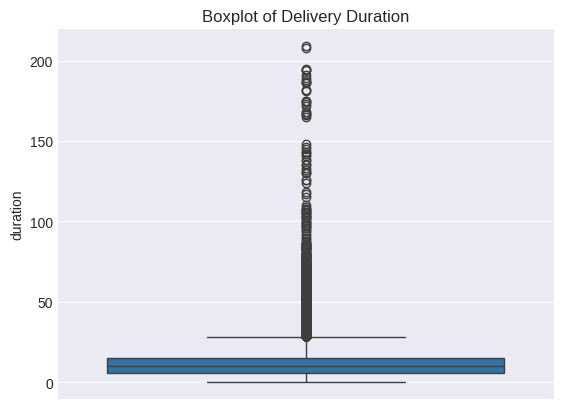

In [ ]:
#Create boxplot before identify outliers
#Original Data with outliers
sns.boxplot(df["duration"])
plt.title('Boxplot of Delivery Duration')

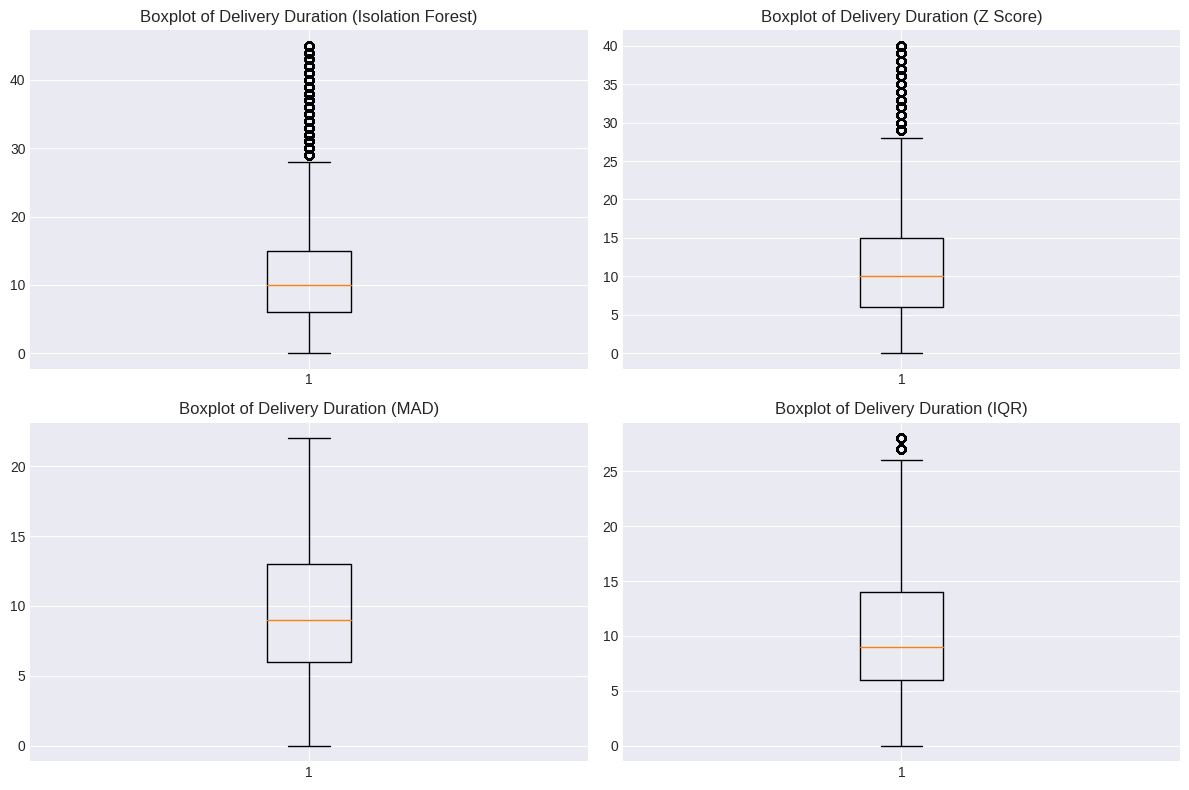

In [ ]:
import matplotlib.pyplot as plt

# Assuming your duration data and outlier-detected versions are already available
# Here are example variables for each set of data:
# duration_original, duration_isolation_forest, duration_mad, duration_zscore, duration_iqr

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 4 boxplots in the 2x2 grid
axes[0, 0].boxplot(df[df["anomaly"]==1]["duration"])
axes[0, 0].set_title('Boxplot of Delivery Duration (Isolation Forest)')

axes[0, 1].boxplot(df[~(df['zscore_duration'].abs() > threshold)]["duration"])
axes[0, 1].set_title('Boxplot of Delivery Duration (Z Score)')

axes[1, 0].boxplot(df[((df['duration'] - median_duration).abs() <= 3 * mad_duration)]["duration"])
axes[1, 0].set_title('Boxplot of Delivery Duration (MAD)')

axes[1, 1].boxplot(df[df["duration"]<29]["duration"]) #IQR method define 28 as a treshold for outliers
axes[1, 1].set_title('Boxplot of Delivery Duration (IQR)')


plt.tight_layout()
plt.show()


**Observations**

1. The first boxplot with "Boxplot of Delivery Duration" headline shows the duration data with many extreme outliers (original data), the one that gets the most attention is the one with a value of over 200 days. Along with descriptive analysis, we can say that these extreme values are likely not normal and may indicate operational delays or data entry errors.

2. The Isolation Forest method includes some outliers, but less than the raw data. The distribution still has a large number of data points outside the box.

3. Z-Score method  removed more outliers than Isolation Forest but our data distribution does not fit with the normal distribution. It is skewed, therefore, this method might not be the best solution.

4. MAD removed more outliers than the previous methods but it still preserves longer duration days such as 20.

5. IQR  shows a moderate number of outliers, with a slightly higher number on the upper side compared to MAD.

Since our data is skewed I believe that MAD or IQR may be a good option in case of handling outliers without removing long delivery durations. My goal is to identify outliers while keeping long delivery duration, I will flag outliers based on IQR method.

**Flag Outliers**

In [ ]:
# Flag outliers using a lambda expression
summary_df["outlier_flag"] = (summary_df['duration'] < lower_bound) | (summary_df['duration'] > upper_bound)
summary_df["outlier_flag"] = summary_df["outlier_flag"].map(lambda x: 'outlier' if x else 'non-outlier')

### **Visualize Outliers**

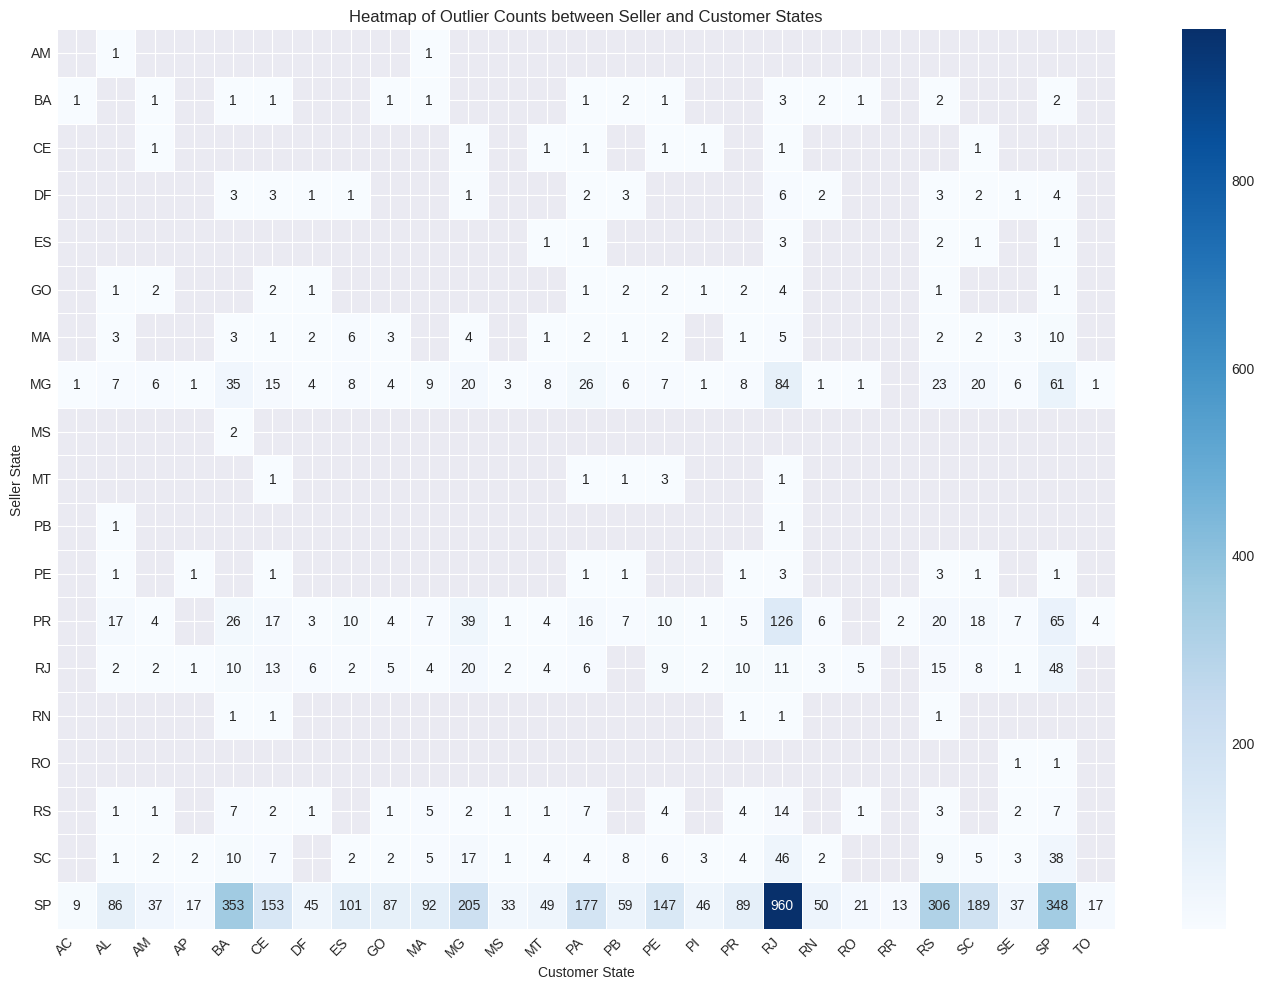

In [ ]:
#Create a dataframe for outliers
outliers_df = summary_df[summary_df['outlier_flag'] == "outlier"]

# Group by seller and customer states to analyze performance by creating average duration, standard deviation of duration and distance
outlier_summary = outliers_df.groupby(['seller_state', 'customer_state']).agg({
    'duration': ['mean', 'std', 'count'],  # Analyze average, standard deviation, and count of outliers
    'distance_km': ['mean', 'std']
}).reset_index()

# Order columns
outlier_summary.columns = ['seller_state', 'customer_state', 'avg_duration', 'std_duration', 'outlier_count', 'avg_distance', 'std_distance']

#Turn data into pivot table
pivot_table = outlier_summary.pivot(index='seller_state', columns='customer_state', values='outlier_count')

#Put data into heatmap, show outlier counts between states
plt.figure(figsize=(14, 10))

sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt="g", linewidths=.5)
# rotate axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title('Heatmap of Outlier Counts between Seller and Customer States')
plt.xlabel('Customer State')
plt.ylabel('Seller State')
plt.tight_layout()
plt.show()

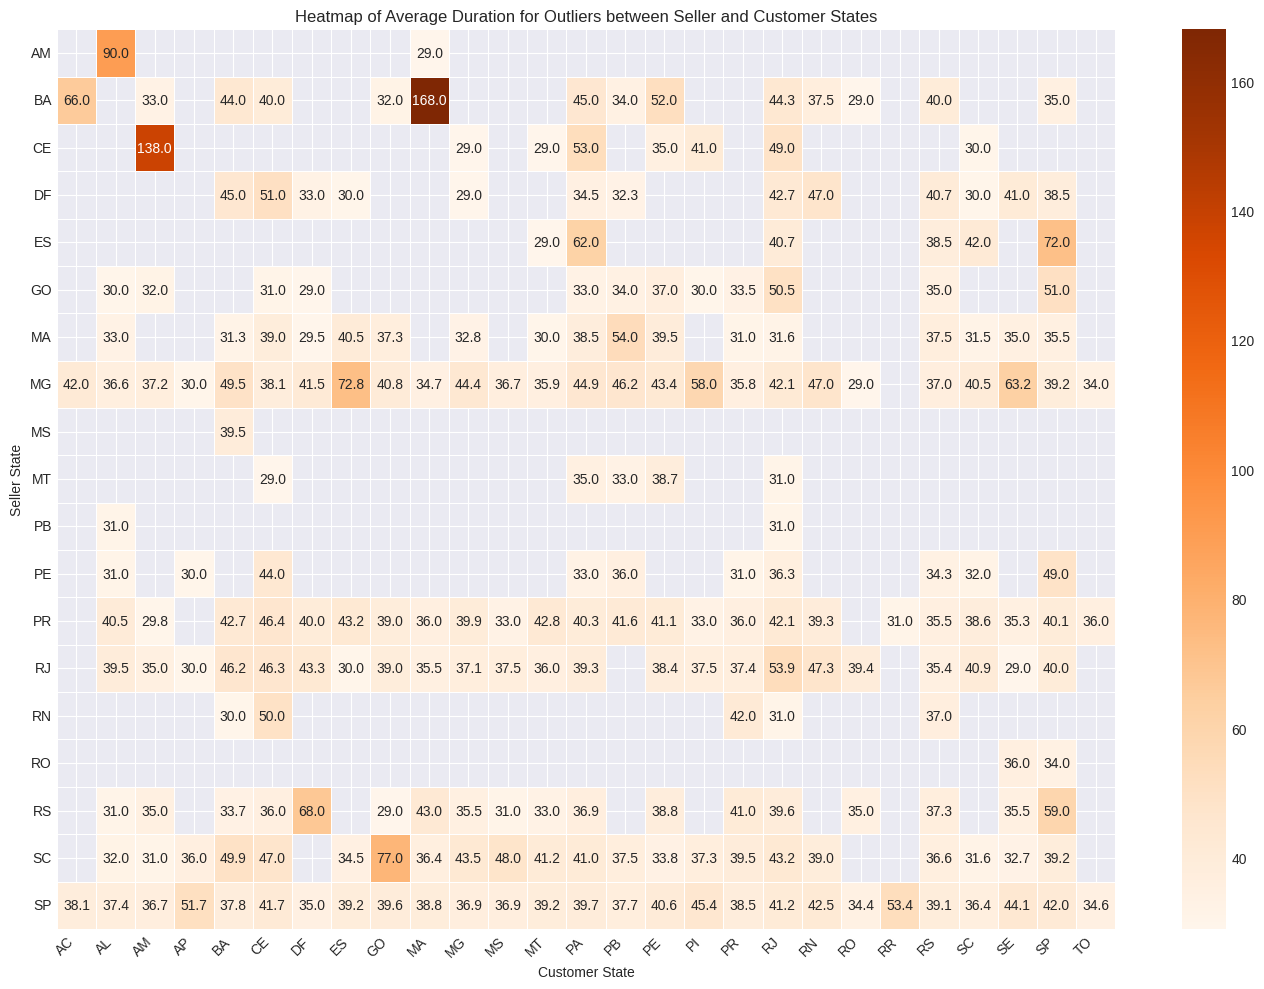

In [ ]:
# Visualizing average duration for outliers between regions
plt.figure(figsize=(14, 10))
pivot_table_duration = outlier_summary.pivot(index='seller_state', columns='customer_state', values='avg_duration')
sns.heatmap(pivot_table_duration, annot=True, cmap="Oranges", fmt=".1f", linewidths=.5)
# rotate axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Heatmap of Average Duration for Outliers between Seller and Customer States')
plt.xlabel('Customer State')
plt.ylabel('Seller State')
plt.tight_layout()
plt.show()

> Outliers can indicate delays or anomalies in delivery performance. They may derive from data entry errors, special occasions, special circumstances such as stock out situations or holidays or transportation problems. The other reason could be the delivery time constantly long for specific sellers or regions.


> SP, PR, MG, SC and RG regions have the most outliers data (Especially from SP to RJ, indicates serious problems with shipment between this areas, average order delivery time is also more than 41 days). This indicate that there could be legitimate problems with sellers in these states instead of data entry errors. Focusing on these regions to performance improvement could be benefical. For other states the outliers might stem for wrong data entries because they have less than 10 outliers.


>Unfortunately, average time is more than 30 days for each state pairs which is obviously frustrating for e-commerce customers. I believe that the durations with dark orange background could be data entry errors since their outliers count is also less than 10. (the shipments depart from AM, BA, CE).

### **Calculating Corelation between Distance and Duration**

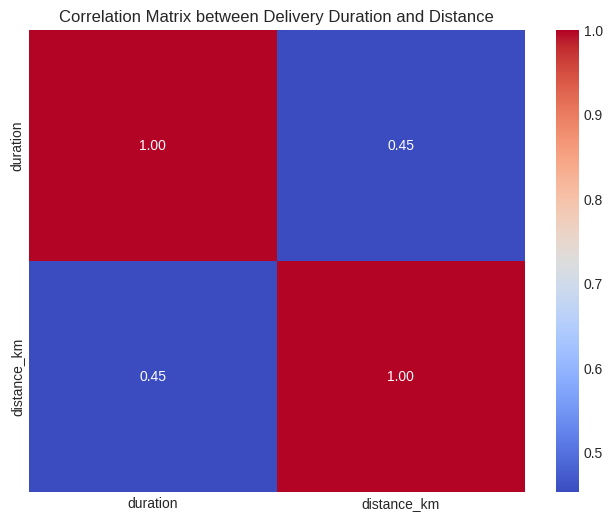

In [ ]:
#create a correlation matrix to examine the relationship between distance and duration time
# calculate the correlation matrix
correlation_matrix = summary_df[summary_df["outlier_flag"]=="non-outlier"][['duration', 'distance_km']].corr()

# Step 2: Visualize the correlation matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Delivery Duration and Distance')
plt.show()

 The correlation between distance and delivery duration is moderate (0.45) suggesting that there are other factors effect delivery time.

Next step is defining underperforming locations by calculating standard deviotion of delivery duration by states


### **Define Underperforming Locations**

In [ ]:
# create a summary data frame without outliers
#categorize data by seller state and customer state, and calculate the mean and standard deviation of duration
state_duration_stats = summary_df[summary_df["outlier_flag"]=="non-outlier"].groupby(['seller_state', 'customer_state']).agg(
    mean_duration=('duration', 'mean'),
    std_duration=('duration', 'std'),
    count=('duration', 'size')
).reset_index()
state_duration_stats.head(5)

,seller_state,customer_state,mean_duration,std_duration,count
0,AM,MG,23.000000,NaN,1
1,BA,AL,15.777778,4.737557,9
2,BA,AP,20.500000,7.778175,2
3,BA,BA,9.492308,5.646136,65
4,BA,CE,13.076923,5.922577,13


In [ ]:
#There are some state pairs which have only 1 orders.
#We need to filter these orders, only include state pairs with enough data
#For filtering the state pairs that have more than 20 orders will be included
state_duration_stats = state_duration_stats[state_duration_stats['count'] > 20]
state_duration_stats.head(5)

,seller_state,customer_state,mean_duration,std_duration,count
3,BA,BA,9.492308,5.646136,65
9,BA,MG,10.117647,3.409675,51
14,BA,PE,15.322581,5.127619,31
17,BA,RJ,11.777778,4.777552,81
24,BA,SP,10.583942,4.189697,137


In [ ]:
#To visualize the data, heatmap will be created. Therefore, the data put into the pivot table
pivot_table = state_duration_stats.pivot(index='seller_state', columns='customer_state', values='std_duration')

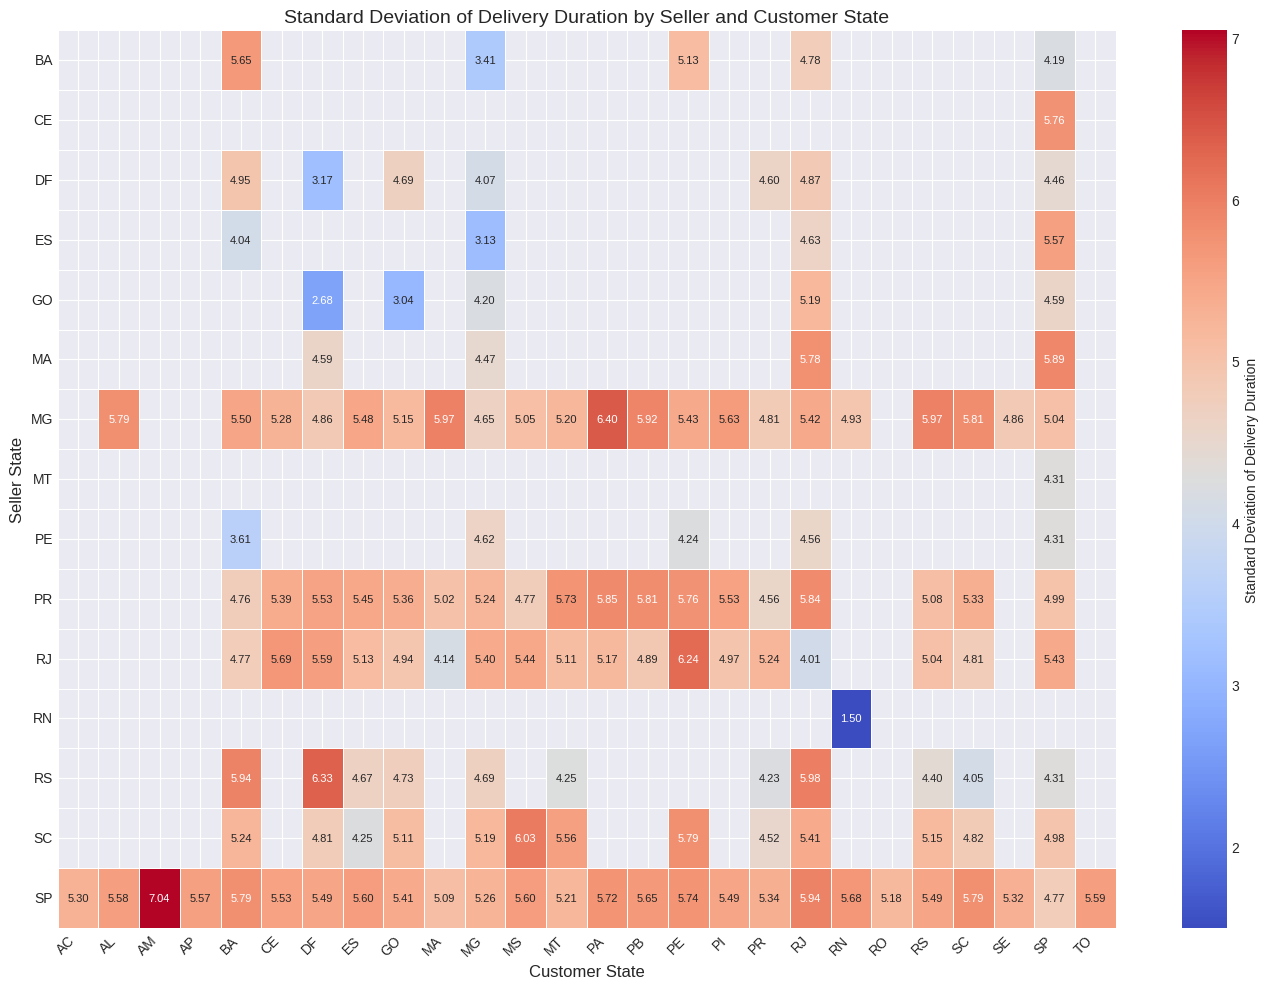

In [ ]:
# create a heatmap to visualize the standard deviation of delivery durations between states
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='coolwarm',
                      cbar_kws={'label': 'Standard Deviation of Delivery Duration'},
                      linewidths=0.5, annot_kws={"size": 8})  # Smaller annotation size

# rotate axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)


plt.title('Standard Deviation of Delivery Duration by Seller and Customer State', fontsize=14)
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Seller State', fontsize=12)

plt.tight_layout()
plt.show()

**High Standard Deviation (Red Areas)**:

1.   from SP to AM (7.04)

This pair is potential area for improvement logistic strategies. Delivery times are relatively inconsistent which can negatively effect customer satisfaction.

>The sellers in SP state already have the most outlier data. Which indicates that Olist should definetly reconsider the arrangments between the sellers from SP state.


**Moderate Standard Deviation (Orange Areas)**:

1. from MG TO PA (6.40)
2. from RS to DF (6.33)
3. from RJ to PE (6.24) etc.


Most of the pairs have moderate standard deviations, these pairs of states have inconsistent delivery durations, some deliveries are quick, while others take significantly longer.

The orders departing from SP regions to all other regions have significantly inconsistent delivery time. The sellers in the SP state should be investigat or need closer monitoring or training to improve their fulfillment process. These sellers should improve their strategies.

The sellers in the SP state should be prioritized first, followed by the MG, PR, RJ and SC states.


**Low Standard Deviation (Blue Areas):**

These state pairs with consistent delivery times, which are performing well.

> I expected the delivery from the same state to the same state to perform best. However, some states performed more consistently for different states rather than themselves. For example;

* from SC to ES shows more stability than SC to SC with 4.82 vs 4.25 standard deviation
* from RS to SC than RS to RS
* from PE to BA than PE to PE
* from GO to DF than GO to GO
* from BA to MG than BA to BA






In [ ]:
#Delivery times by region

#Calculate average delivery time by customer state
avg_delivery_by_region = summary_df[summary_df["outlier_flag"]=="non-outlier"].groupby('customer_state')['duration'].mean().reset_index()
avg_delivery_by_region.columns = ['Region', 'Avg_Delivery_Time']

#Calculate average delivery time by seller
avg_delivery_by_seller = summary_df[summary_df["outlier_flag"]=="non-outlier"].groupby('seller_id')['duration'].mean().reset_index()
avg_delivery_by_seller.columns = ['Seller_ID', 'Avg_Delivery_Time']

In [ ]:
avg_delivery_by_region.head(2)

,Region,Avg_Delivery_Time
0,AC,17.400000
1,AL,17.880702


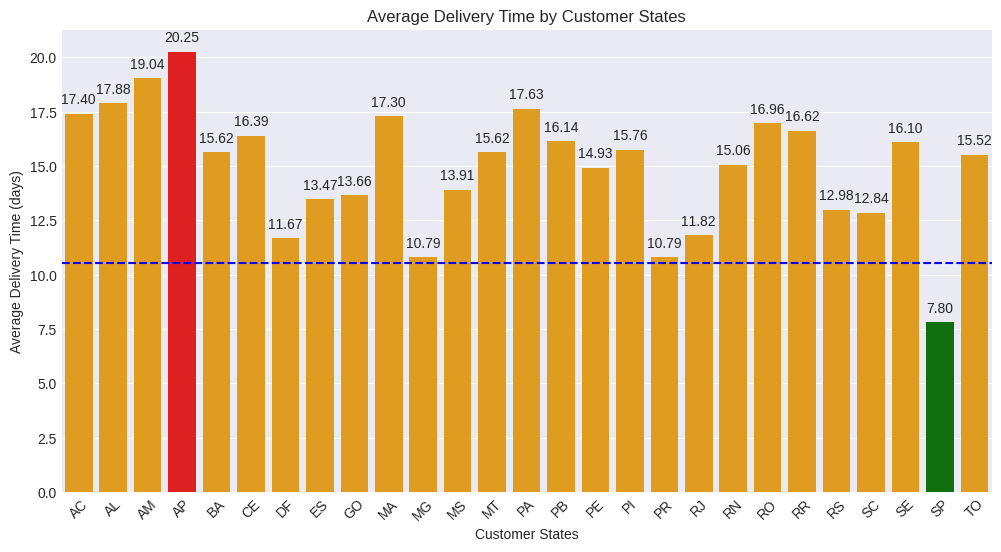

In [ ]:
# Visualize the delivery times by region
plt.figure(figsize=(12, 6))

#add spesific color code for each bar based on average delivery time
values = avg_delivery_by_region['Avg_Delivery_Time']
colors = ['red' if value > 20 else 'orange' if value > 10 and value <= 20 else 'green' for value in values]

ax=sns.barplot(x='Region', y='Avg_Delivery_Time', data=avg_delivery_by_region, palette=colors)

#add a constant line to show average duration days.
plt.axhline(y=summary_df[summary_df["outlier_flag"]=="non-outlier"]["duration"].mean(), color='b', linestyle='--')

#add annotation on bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Average Delivery Time by Customer States')
plt.xticks(rotation=45)
plt.ylabel('Average Delivery Time (days)')
plt.xlabel('Customer States')
plt.show()

>This barplot shows that the shipment process needs to be improved.The average days it takes to deliver products to customers are more than 10 days for each region.

>There is no sellers located in AP, RR, SE states. These could be the reason long delivery times to these states. For these areas new seller can be found to create a more stable logistic performance.
The other option is not selling products to these areas but there is already a customer base for these regions, if Olist wants to expand the sales area, Olist should consider to build new relationship new sellers from these states.

>Specifically for the AP state, delivering products take more than 20 days (red bars), Olist should consider making aggrements additional warehouses or optimizing existing logistics routes.

>In the "Mini Analysis; One Time Buyers vs Repeating Customers" section, I found out that 96.9% of the customers are one-time-buyers.These delivery times probably the most impactful reasons for this situation. Long delivery times make customers upset and prevent them to shopping from Olist consistently.


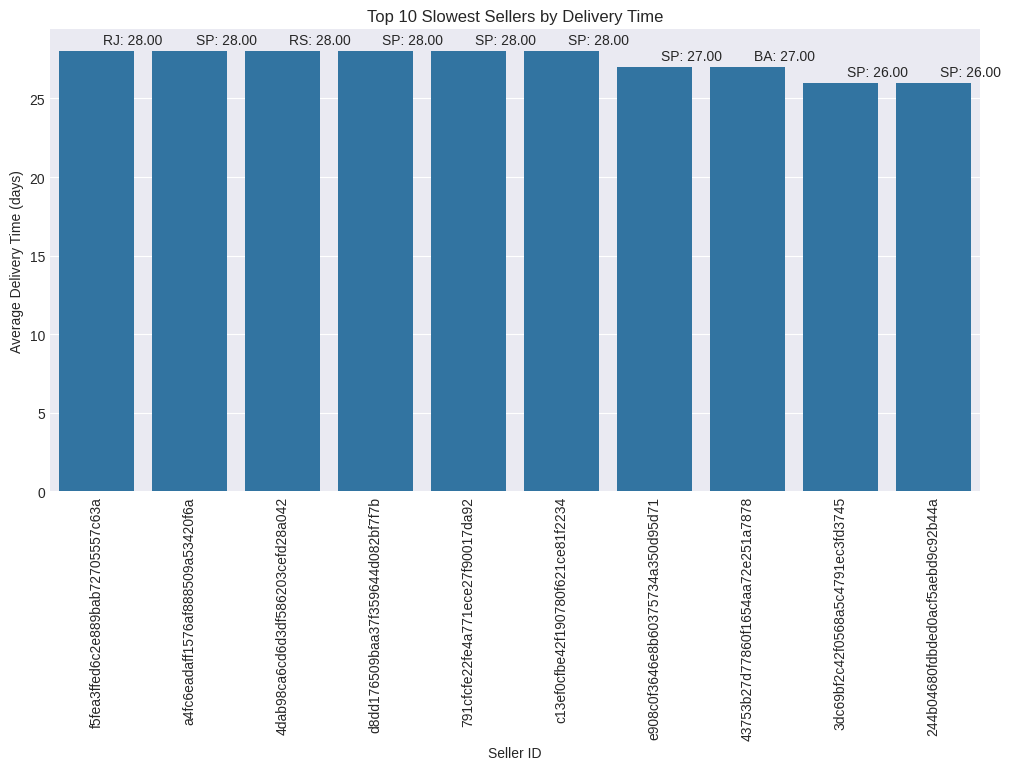

In [ ]:
#Visualize the delivery times by seller (Top 10 slowest sellers)
top_slow_sellers = avg_delivery_by_seller.sort_values(by='Avg_Delivery_Time', ascending=False).head(10)
top_slow_sellers= top_slow_sellers.merge(df_sellers[["seller_id","seller_state"]],right_on="seller_id", left_on="Seller_ID",how="inner")[["Seller_ID","Avg_Delivery_Time","seller_state"]]

plt.figure(figsize=(12, 6))
ax=sns.barplot(x='Seller_ID', y='Avg_Delivery_Time', data=top_slow_sellers)
#add annotation on bars


for i, row in top_slow_sellers.iterrows():
  annotation_text = f"{row['seller_state']}: {row['Avg_Delivery_Time']:.2f}"
  plt.annotate(annotation_text, (row['Seller_ID'], row['Avg_Delivery_Time']), xytext=(5, 5), textcoords='offset points')

plt.title('Top 10 Slowest Sellers by Delivery Time')
plt.xticks(rotation=90)
plt.ylabel('Average Delivery Time (days)')
plt.xlabel('Seller ID')
plt.show()

Unfortunately we dont have the name of sellers but seller_id. But this barplot indicates that sellers are really underperformed delivering products to customers.

Except from the sellers in RS, BA, the other states has already higlighted in the previous sections to be focused on. For the SP states (with the worst performance and the highest number of outliers) these sellers that appears in the bar chart can be prioritized.


## **Question 3: Product Performance Analysis based on States**

**Question**: Which product categories are popular in different states? Are there any specific categories that are particularly common or underperforming in certain locations?


In [ ]:
#Create dataframe to analyze product performance
#Get product category name from product table
df_product_perf=df_final_orders.merge(df_products[["product_id","product_category_name"]],right_on="product_id", left_on="product_id",how="inner")
#getting state information from customer table to explore which states commonly purchase which products
df_product_perf=df_product_perf.merge(df_customers[["customer_id","customer_state"]],right_on="customer_id", left_on="customer_id",how="inner")
#Drop unneccessary columns
df_product_perf = df_product_perf.loc[:, df_product_perf.columns.isin(["product_category_name","customer_state","order_id","Total_Order_Value","Total_Item"])]

In [ ]:
df_product_perf.head(2)

,order_id,Total_Item,Total_Order_Value,product_category_name,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,72.19,cool_stuff,RJ
1,130898c0987d1801452a8ed92a670612,1,73.86,cool_stuff,GO


> I applied **80-20 Pareto Principle** to define best performed product categories and top performing states for each product categories.


In [ ]:
#Calculate total pieces sold per product category
category_sales = df_product_perf.groupby('product_category_name')['Total_Item'].sum().reset_index()

#Sort product categories based on their quantity
category_sales = category_sales.sort_values('Total_Item', ascending=False)

#Calculate the cumulative percentage of sales
category_sales['cumulative_percentage'] = category_sales['Total_Item'].cumsum() / category_sales['Total_Item'].sum() * 100

#Apply the 80-20 rule
#Filter product categories that contribute to 80% of total sales
top_categories_80_20 = category_sales[category_sales['cumulative_percentage'] <= 80]['product_category_name'].tolist()

#Filter the dataset for these top product categories
top_category_data = df_product_perf[df_product_perf['product_category_name'].isin(top_categories_80_20)]

In [ ]:
#Identify best performing states for each product categories
#Calculate total quantity sold per state within each product category
category_region_sales = top_category_data.groupby(['product_category_name', 'customer_state'])['Total_Item'].sum().reset_index()

#Sort by quantity sold within each category
category_region_sales = category_region_sales.sort_values(['product_category_name', 'Total_Item'], ascending=[True, False])

#For each product category, calculate cumulative percentage for states
category_region_sales['cumulative_percentage'] = category_region_sales.groupby('product_category_name')['Total_Item'].cumsum() / category_region_sales.groupby('product_category_name')['Total_Item'].transform('sum') * 100

#Apply 80-20 rule to states within each category
top_category_region_sales = category_region_sales[category_region_sales['cumulative_percentage'] <= 80]

In [ ]:
top_category_region_sales.sort_values("Total_Item")

,product_category_name,customer_state,Total_Item,cumulative_percentage
316,perfumaria,RS,151,77.335329
311,perfumaria,PR,153,72.814371
43,bebes,PR,158,77.364185
156,cool_stuff,SC,159,78.725121
182,eletronicos,RS,165,75.522169
...,...,...,...,...
399,utilidades_domesticas,SP,3184,46.857984
293,moveis_decoracao,SP,3454,42.328431
212,esporte_lazer,SP,3576,42.414897
78,beleza_saude,SP,4125,43.581616


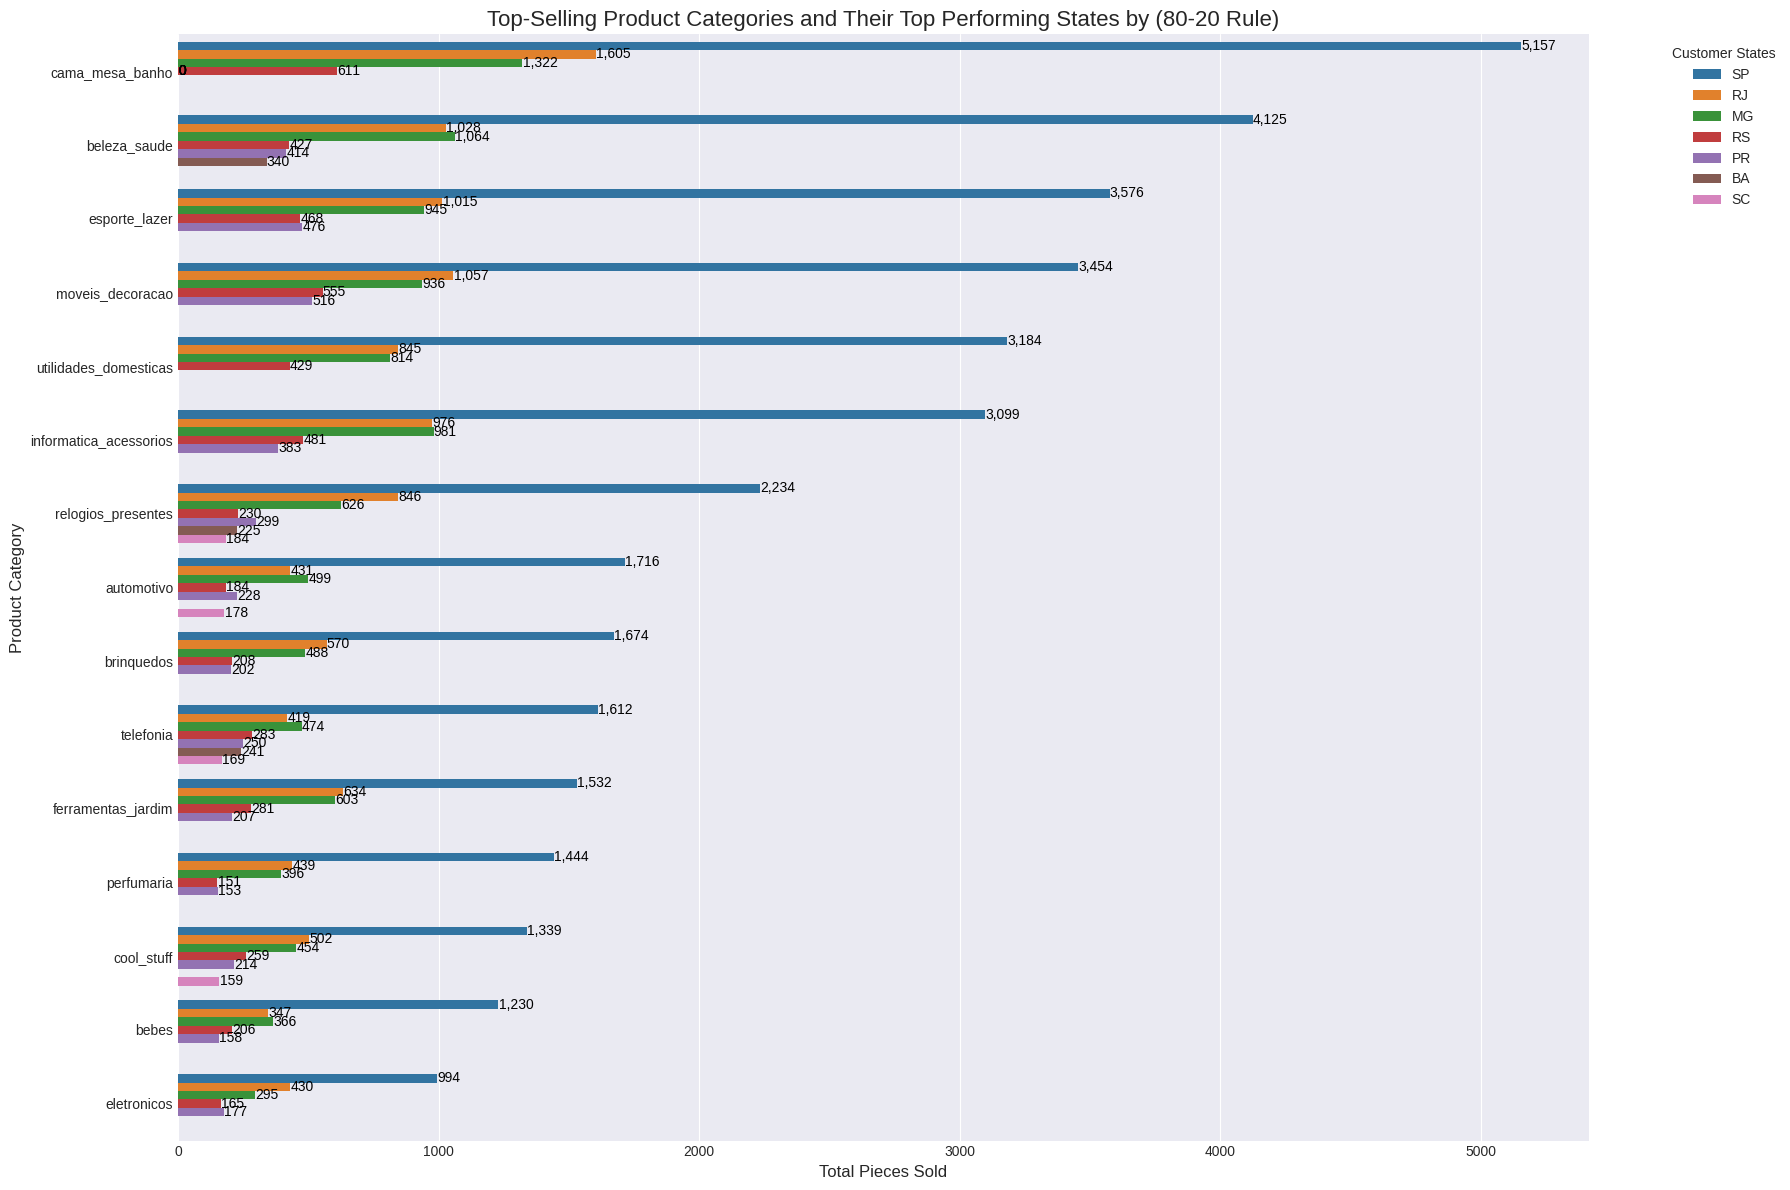

In [ ]:
#Visualize data with bar chart
#Create a horizontal barplot of the best-performing product categories and states
plt.figure(figsize=(18, 12))


# Horizontal bar plot
barplot = sns.barplot(x='Total_Item', y='product_category_name', hue='customer_state', data=top_category_region_sales.sort_values("Total_Item", ascending=False), dodge=True)

#the title and labels
plt.title('Top-Selling Product Categories and Their Top Performing States by (80-20 Rule)', fontsize=16)
plt.xlabel('Total Pieces Sold', fontsize=12)
plt.ylabel('Product Category', fontsize=12)


plt.legend(title='Customer States', bbox_to_anchor=(1.05, 1), loc='upper left')

#annotations
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 1,  # Adjust the position of the text
             p.get_y() + p.get_height() / 2,
             f'{int(width):,}',  # Format the annotation text
             va='center', fontsize=10, color='black')


plt.tight_layout()
plt.show()


In [ ]:
#For each top-selling product category, list its top-performing regions
#the list version of the bar chart
for category in top_categories_80_20:
    regions = top_category_region_sales[top_category_region_sales['product_category_name'] == category]
    print(f"Product Category: {category}")
    print("Top Regions:")
    print(regions[['customer_state', 'Total_Item']].to_string(index=False))
    print("\n")

Product Category: cama_mesa_banho
Top Regions:
customer_state  Total_Item
            SP        5157
            RJ        1605
            MG        1322
            RS         611


Product Category: beleza_saude
Top Regions:
customer_state  Total_Item
            SP        4125
            MG        1064
            RJ        1028
            RS         427
            PR         414
            BA         340


Product Category: esporte_lazer
Top Regions:
customer_state  Total_Item
            SP        3576
            RJ        1015
            MG         945
            PR         476
            RS         468


Product Category: moveis_decoracao
Top Regions:
customer_state  Total_Item
            SP        3454
            RJ        1057
            MG         936
            RS         555
            PR         516


Product Category: informatica_acessorios
Top Regions:
customer_state  Total_Item
            SP        3099
            MG         981
            RJ         97

**Observations;**

SP state dominates across all categories, we can say SP is the highest-performing state.Especially categories like cama_mesa_banho, beleza_saude and esporte_lazer perform well in SP, suggesting that SP is a key market for almost every category.

RJ, MG, RS are consistently best performing states for multiple product categories but not that as much as SP.

PR and BA are seen in some categories such as beleza_saude, esporte_lazer(PR), etc. These regions has a potential and may be targeted for growth.

For these best performing states and products Olist should monitor inventory availability closely to avoid stockouts and missed sales opportunities.


## **Question 4: Cross Selling and Up Selling Product Combinations**

**Question**: What are the most common product combinations ordered together? Determine cross-selling or up-selling products.

In [ ]:
#Create dataframe shows product id, category name, order_id, quantity and revenue
df_product_comb=df_final_orders.merge(df_products[["product_id","product_category_name"]],on="product_id",how="inner")[["order_id","product_id","product_category_name","Total_Item","Total_Order_Value","Unit_Price"]]
#drop product categories equals to "Other". In the data cleaning process, I filled null categories with others. I will not include this data into analysis
df_product_comb = df_product_comb[df_product_comb["product_category_name"] != "Others"]
df=df_product_comb

In [ ]:
#Calculate the percentage of orders include more than one different product
multi_product_orders = df.groupby('order_id')['product_id'].nunique().reset_index()
multi_product_orders = multi_product_orders[multi_product_orders['product_id'] > 1]
print("The percentage of the orders that have more than one product to all orders: % {}".format((multi_product_orders["order_id"].nunique() / df["order_id"].nunique()) * 100))

The percentage of the orders that have more than one product to all orders: % 3.301242301305362


The percentage of the orders that have more than one product to all orders shows that only 3%. The majority of customers purchase only a single type of product in their order. This indicates a significant opportunity to increase sales through upselling and cross-selling strategies by encouraging customers to add additional, different products to their orders.

### **Defining Upselling Product Categories**

> Upselling products refer to convince customers to buy more expensive products from the store.

> Orders that contain more than one product are included for this analysis.

> I calculated the contribution rate of each product to total order value.
I set treshold as 50% percentage to define upselling product categories.If product category contributes at least 50% percentage to the total order, this product category can be tagged as upselling product category.

In [ ]:
#merge filtered dataset with the original dataframe to include only multi-product orders
df_filtered = df.merge(multi_product_orders[['order_id']], on='order_id', how='inner')

#Calculate total quantity for each order
total_items_per_order = df_filtered.groupby('order_id')['Total_Item'].sum().reset_index()
total_items_per_order.rename(columns={'Total_Item': 'Total_Items'}, inplace=True)

#Calculate total order value for each order
total_order_value = df_filtered.groupby('order_id')['Total_Order_Value'].sum().reset_index()

#merge total order value and total items to the filtered dataframe
df_filtered = df_filtered.merge(total_order_value, on='order_id', suffixes=('', '_Total'))
df_filtered = df_filtered.merge(total_items_per_order, on='order_id')

#calculate the contribution of each product category to the total order value
df_filtered['Category_Contribution'] = (df_filtered['Total_Item'] * df_filtered['Total_Order_Value']) / df_filtered['Total_Items']

#set threshold as 50% of the total order value
threshold_percentage = 0.5

#calculate the minimum contribution required for upselling
df_filtered['Min_Contribution'] = df_filtered['Total_Order_Value_Total'] * threshold_percentage

#filter the categories that meet the upselling criteria
upselling_categories = df_filtered[df_filtered['Category_Contribution'] >= df_filtered['Min_Contribution']]

#Get unique product categories that meet the upselling criteria
unique_upselling_categories = upselling_categories['product_category_name'].unique()

print("Upselling Product Categories based on the 50% threshold for multi-product orders:\n")
print(unique_upselling_categories)
print("\nNumber of Upselling Product Categories:", len(unique_upselling_categories))

Upselling Product Categories based on the 50% threshold for multi-product orders:

['ferramentas_jardim' 'informatica_acessorios' 'cama_mesa_banho'
 'casa_conforto' 'moveis_escritorio' 'fashion_bolsas_e_acessorios'
 'esporte_lazer' 'utilidades_domesticas' 'brinquedos' 'papelaria'
 'telefonia' 'cool_stuff' 'moveis_decoracao' 'perfumaria'
 'construcao_ferramentas_iluminacao']

Number of Upselling Product Categories: 15


 Out of 73 categories, 15 categories were identified as key upselling opportunities. These categories significantly contribute to at least 50% of the total order value when included in multi-product orders.

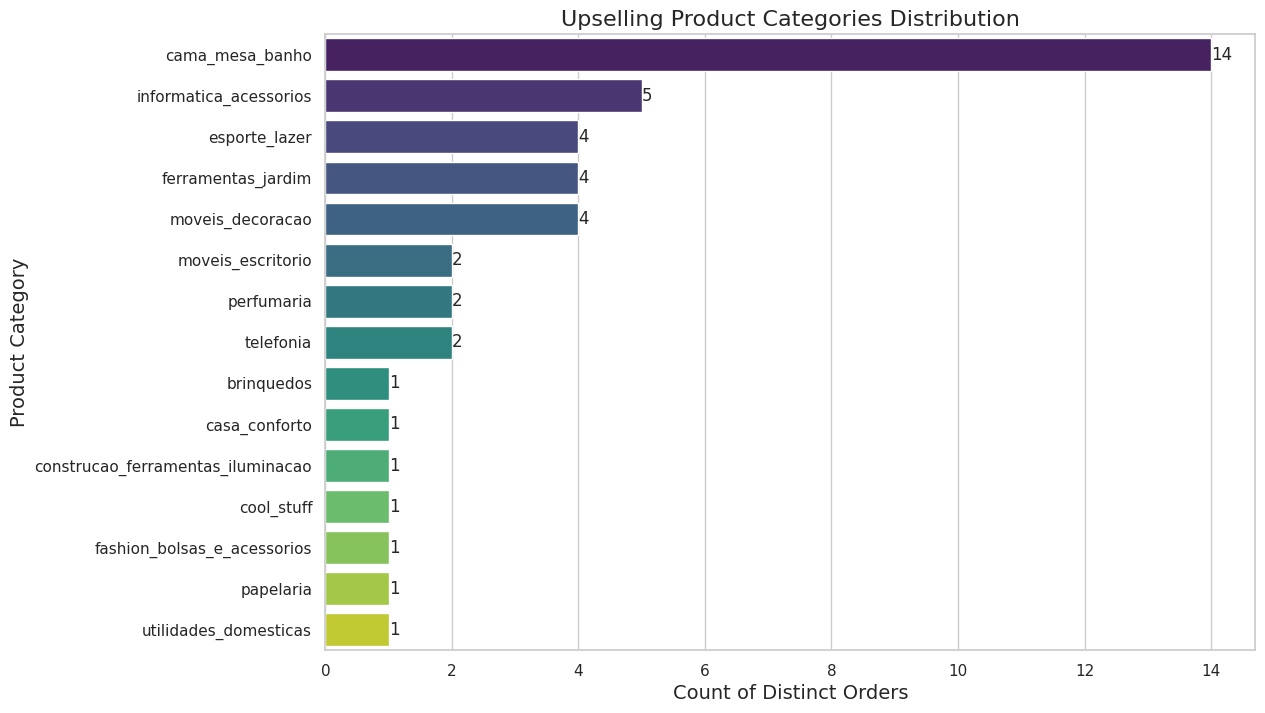

In [ ]:
#How many times this upselling product categories appeared in orders?
sns.set(style="whitegrid")

category_counts = upselling_categories.groupby("product_category_name")["order_id"].count().reset_index(name='count').sort_values(by='count', ascending =False)
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='product_category_name', data=category_counts, palette='viridis')

#annotations
for i in range(len(category_counts)):
    count = category_counts.iloc[i, 1]
    plt.text(count, i, count, va='center')


#titles and labels
plt.title('Upselling Product Categories Distribution', fontsize=16)
plt.xlabel('Count of Distinct Orders', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

plt.show()

**Observations**


> The bar plot represents the upselling product categories based on their frequency in multi-product orders. Targeting these key categories (e.g., cama_mesa_banho, beleza_saude, and esporte_lazer) to promote additional products in customer orders, helping to increase the chance of a multi-product purchase.


### **Defining Cross Selling Products**

> In the current scenario, only 3% of orders have more than one different product. I think defining and focusing on cross-selling products is crucial to increasing order revenue value and customer satisfaction by recommending related or complementary products to convince customers to purchase more products.

> In this analysis, Products ordered more than 5 times are included and each pair should appear at least 5 times to be considered as cross selling product categories.

>The data only have product id, so instead of sharing theirs names, id information will be displayed in the figures.

In [ ]:
#products should be ordered at least 5 times
min_order_count = 5
product_counts = df['product_id'].value_counts()
frequent_products = product_counts[product_counts >= min_order_count].index

#Filter the dataset for frequent products only
df_filtered = df[df['product_id'].isin(frequent_products)]

In [ ]:
#Calculating product combinations bought together
from itertools import combinations
from collections import Counter

#Create a list of product sets (products in the same order)
product_sets = df_filtered.groupby('order_id')['product_id'].apply(set)

#Generate all possible product pairs (combinations of two products per order)
product_pairs = product_sets.apply(lambda x: list(combinations(x, 2)))

#Flatten the list of product pairs
flat_product_pairs = [pair for sublist in product_pairs for pair in sublist]

#Count how often each product pair appears together
pair_counts = Counter(flat_product_pairs)

#Convert to DataFrame for analysis
pair_df = pd.DataFrame(pair_counts.items(), columns=['product_pair', 'count']).sort_values(by='count', ascending=False)

In [ ]:
# Filter pairs that appear together more than 5 times
threshold = 5
cross_selling_opportunities = pair_df[pair_df['count'] >= threshold]

print("Top Cross-Selling Product Pairs:")
print(cross_selling_opportunities.head(10))


Top Cross-Selling Product Pairs:
                                          product_pair  count
37   (e53e557d5a159f5aa2c5e995dfdf244b, 36f60d45225...     34
200  (99a4788cb24856965c36a24e339b6058, 35afc973633...     29
38   (f4f67ccaece962d013a4e1d7dc3a61f7, 4fcb3d9a5f4...     17
127  (3f14d740544f37ece8a9e7bc8349797e, 36f60d45225...     12
70   (389d119b48cf3043d311335e499d9c6b, 422879e10f4...     11
23   (389d119b48cf3043d311335e499d9c6b, 53759a2ecdd...      9
118  (53759a2ecddad2bb87a079a1f1519f73, 368c6c73084...      8
271  (422879e10f46682990de24d770e7f83d, 53759a2ecdd...      7
240  (0d85c435fd60b277ffb9e9b0f88f927a, ee57070aa3b...      6
284  (5d790355cbeded0cd60e25cbc4c527a2, 5fc3e6a4b52...      6


In [ ]:
#I want to list the each product along with their category name
pair_df[['product1', 'product2']] = pd.DataFrame(pair_df['product_pair'].tolist(), index=pair_df.index)

# Merge with the product mapping to get category names
pair_df = pair_df.merge(df_products, left_on='product1', right_on='product_id', how='left').rename(columns={'product_category_name': 'category1'})
pair_df = pair_df.merge(df_products, left_on='product2', right_on='product_id', how='left').rename(columns={'product_category_name': 'category2'})

#Drop unnecessary columns like the duplicate product_id
pair_df = pair_df[['product1', 'category1', 'product2', 'category2', 'count']]

print(pair_df.head())

                           product1               category1  \
0  e53e557d5a159f5aa2c5e995dfdf244b  informatica_acessorios   
1  99a4788cb24856965c36a24e339b6058         cama_mesa_banho   
2  f4f67ccaece962d013a4e1d7dc3a61f7              automotivo   
3  3f14d740544f37ece8a9e7bc8349797e  informatica_acessorios   
4  389d119b48cf3043d311335e499d9c6b      ferramentas_jardim   

                           product2               category2  count  
0  36f60d45225e60c7da4558b070ce4b60  informatica_acessorios     34  
1  35afc973633aaeb6b877ff57b2793310           casa_conforto     29  
2  4fcb3d9a5f4871e8362dfedbdb02b064              automotivo     17  
3  36f60d45225e60c7da4558b070ce4b60  informatica_acessorios     12  
4  422879e10f46682990de24d770e7f83d      ferramentas_jardim     11  


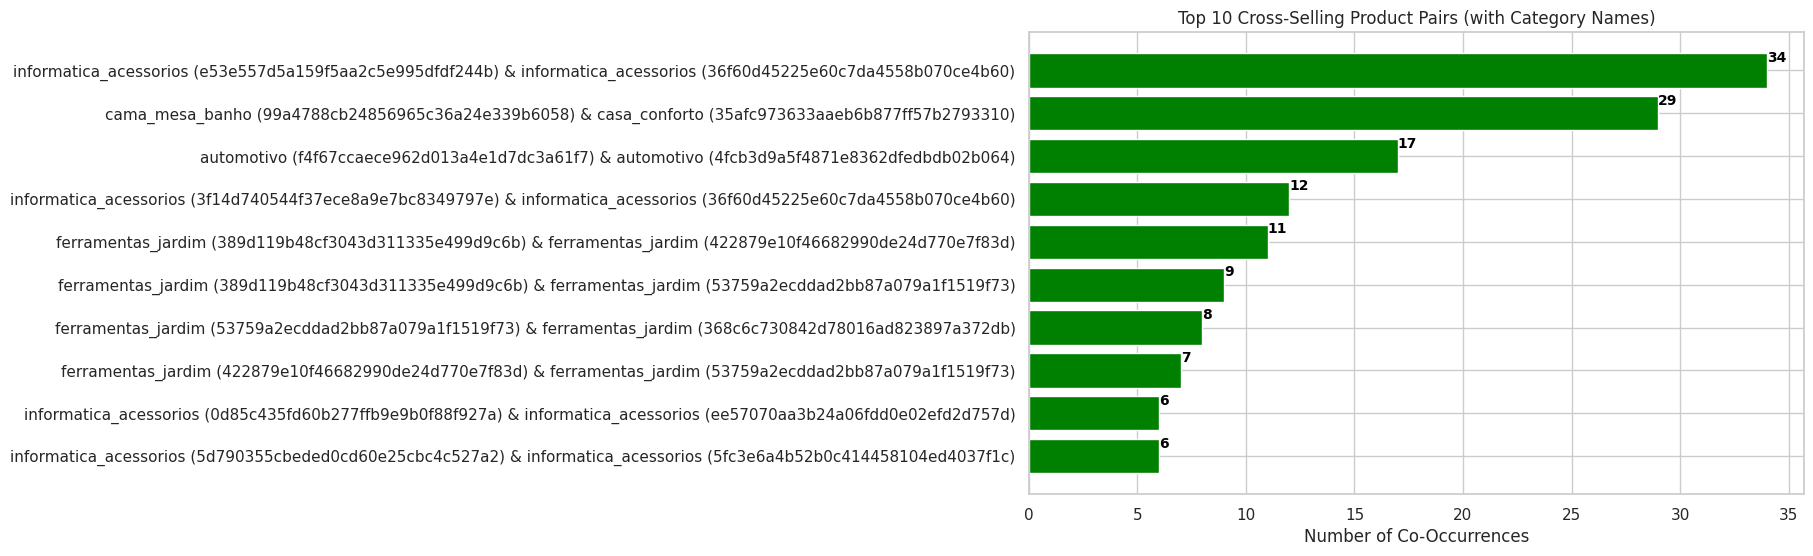

In [ ]:
#visualize the top 10 cross-selling opportunities with category names
top_cross_sell = pair_df.head(10)

#format product and category together for better visualization
top_cross_sell['product_pair'] = top_cross_sell.apply(lambda row: f"{row['category1']} ({row['product1']}) & {row['category2']} ({row['product2']})", axis=1)

plt.figure(figsize=(10,6))
plt.barh(top_cross_sell['product_pair'], top_cross_sell['count'], color='green')
plt.gca().invert_yaxis()
ax = plt.gca()

#Add annotation
for i in ax.patches:
  plt.text(i.get_x() + i.get_width(), i.get_y() + 0.2,
           str(round((i.get_width()), 2)),
           fontsize = 10, fontweight ='bold',
           color ='black')

plt.xlabel('Number of Co-Occurrences')
plt.title('Top 10 Cross-Selling Product Pairs (with Category Names)')
plt.show()

**Observation**

Many of the product pairs are from the same product categories, such as Informatica_Acessorios and Ferramentas_Jardim.

Olist can focus on promoting products that frequently sold together, such as Informatica_Acessorios category. For example, suggesting related items to customer during purchase from this category can promote the customer to buy additional products.

Developing promotional bundles or discounts for cross selling products is really crucial in the name of boosting sales by appealing customers.

The product ids listed together in the bar chart is a great options to create bundle. For example, Olist can create Informatica_Acessorios bundles by using these two product id; "36f60d45225e60c7da4558b070ce4b60", e53e557d5a159f5aa2c5e995dfdf244b

## **Question 5: Impact of Shipment Costs**

**Question**: What is the impact of shipment costs(Freight) on revenue?




So far, in the delivery performance section, It is discovered Olist experiences long delivery duration, particularly sellers in the SP state. Moreover, outlier detection indicated certain seller consistenly underperforming in terms of shipment efficiency. Considering that, The only cost the dataset has is a freight (shipment) cost. Analyzing impact of this shipment cost on overall revenue may highlights the need for new effective logistic strategies.

> In the delivery performance section,  it has been observed that there is a moderate corelation between shipment duration and distance_km (from seller to customer). The corelation betweeen Freight cost, duration, and product size information such as kg, length, etc. will be calculated again.

>Freigh Percentage = (Unit Freight Value / Total Order Value) * 100 will be used as a main KPI to measure effect of shipment costs.

In [ ]:
#Create a dataframe to use in the analysis.
#Same steps in the delivery section are followed
#Get customer location information from customer dataframe
freight_df= df_final_orders[["order_id",
                             "seller_id",
                             "customer_id",
                             "product_id",
                             "order_purchase_timestamp",
                             "order_delivered_customer_date",
                             "Total_Order_Value",
                             "Total_Item",
                             "Freight_Value"]].merge(df_customers[["customer_id","customer_state","customer_city","lat","long"]],on="customer_id",how="inner")
#Get seller location information from seller dataframe
freight_df=freight_df.merge(df_sellers[["seller_city","seller_state","lat","long","seller_id"]],on="seller_id",how="inner")
#get the product information from product dataframe
freight_df=freight_df.merge(df_products[["product_id","product_category_name","product_weight_g","product_length_cm","product_height_cm","product_width_cm"]],on="product_id",how="inner")
#adjust date columns
freight_df["order_purchase_timestamp"]=pd.to_datetime(freight_df["order_purchase_timestamp"])
freight_df["order_delivered_customer_date"]=pd.to_datetime(freight_df["order_delivered_customer_date"])
#rename columns
freight_df.rename(columns=({"order_purchase_timestamp":"order_date",
                            "order_delivered_customer_date":"delivered_date",
                            "lat_x":"lat_customer",
                            "long_x":"long_customer",
                            "lat_y":"lat_seller",
                            "long_y":"long_seller"}),inplace=True)

freight_df['duration'] = (freight_df['delivered_date'] - freight_df['order_date']).dt.days

#use haversine again to calculate distance between customer and seller
freight_df['distance_km'] = freight_df.apply(lambda row: haversine(row['lat_seller'], row['long_seller'], row['lat_customer'], row['long_customer']), axis=1)


In [ ]:
#Add KPI
freight_df['freight_percentage'] = (freight_df['Freight_Value'] / freight_df['Total_Order_Value']) * 100

In [ ]:
#be able to see each column
pd.set_option('display.max_columns', None)
print("Head 3 rows of freight_df:")
freight_df.head(3)
#pd.reset_option('display.max_columns')

Head 3 rows of freight_df:


,order_id,seller_id,customer_id,product_id,order_date,delivered_date,Total_Order_Value,Total_Item,Freight_Value,customer_state,customer_city,lat_customer,long_customer,seller_city,seller_state,lat_seller,long_seller,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,duration,distance_km,freight_percentage
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,2017-09-13 08:59:02,2017-09-20 23:43:48,72.19,1,13.29,RJ,campos dos goytacazes,-21.763186,-41.310265,volta redonda,SP,-22.497188,-44.127324,cool_stuff,650.0,28.0,9.0,14.0,7,301.419473,18.409752
1,130898c0987d1801452a8ed92a670612,48436dade18ac8b2bce089ec2a041202,e6eecc5a77de221464d1c4eaff0a9b64,4244733e06e7ecb4970a6e2683c13e61,2017-06-28 11:52:20,2017-07-13 20:39:29,73.86,1,17.96,GO,jatai,-17.884803,-51.717167,volta redonda,SP,-22.497188,-44.127324,cool_stuff,650.0,28.0,9.0,14.0,15,943.322990,24.316274
2,532ed5e14e24ae1f0d735b91524b98b9,48436dade18ac8b2bce089ec2a041202,4ef55bf80f711b372afebcb7c715344a,4244733e06e7ecb4970a6e2683c13e61,2018-05-18 10:25:53,2018-06-04 18:34:26,83.23,1,18.33,MG,belo horizonte,-19.913964,-43.976106,volta redonda,SP,-22.497188,-44.127324,cool_stuff,650.0,28.0,9.0,14.0,17,287.668723,22.023309


In [ ]:
freight_df.describe().T

,count,mean,min,25%,50%,75%,max,std
order_date,100196,2018-01-02 00:12:45.685346816,2016-09-15 12:16:38,2017-09-14 09:43:54,2018-01-20 16:05:14,2018-05-05 21:13:03,2018-08-29 15:00:37,NaN
delivered_date,100196,2018-01-14 12:08:05.013922560,2016-10-11 13:46:32,2017-09-25 22:09:25.750000128,2018-02-02 16:10:59,2018-05-15 23:43:31.750000128,2018-10-17 13:22:46,NaN
Total_Order_Value,100196.0,152.025443,7.28,59.08,99.9,167.87,13468.01,210.429792
Total_Item,100196.0,1.099814,1.0,1.0,1.0,1.0,20.0,0.456291
Freight_Value,100196.0,20.069096,0.0,13.14,16.32,21.19,409.68,15.780795
lat_customer,99923.0,-21.209269,-33.68989,-23.589818,-22.924854,-20.140471,42.184003,5.58646
long_customer,99923.0,-46.193359,-72.668821,-48.109939,-46.632901,-43.635549,-8.723762,4.046468
lat_seller,99974.0,-22.794055,-32.075303,-23.612499,-23.418614,-21.757225,-2.503158,2.737096
long_seller,99974.0,-47.235207,-63.893789,-48.829541,-46.756262,-46.522432,-34.855831,2.342643
product_weight_g,100196.0,2085.729879,0.0,300.0,700.0,1800.0,40425.0,3739.498208


**Observation**

1. Total Order Value: The range is significant, with a minimum value of 7.28 and a maximum of 13,468.01. The majority of purchases are moderate value. (%75 percentile is 167.8). Even though the number is less, there are some high-value orders.

2. Freight_Value & Freight_Percentage: The mean of Freight Value is 20 but there are some outliers with 409.68. It was revealed and analyzed that there are outliers in the dataset in case of shipment process. We can notice this situation by checking the "duration" columns again.

 For many orders, the freight cost could be a significant part of the total order value (the mean is 20.16 %), This ratio could potentially discouraging and negatively effect the profitability of sales.

 We can also say that there are free shipping policy for some of the orders


3. Product Weight and Dimensions: The average value of product weight is roughly 2 kg,  Product Weight shows wide range to 40 kg. We can say that the catalog of products consist of small or heavy ones.


### **Analyzing Free Shipping**

In [ ]:
#tag orders that offer free shipping
freight_df['free_shipping'] = freight_df['Freight_Value'].apply(lambda x: 'free shipping' if x == 0 else 'other')

In [ ]:
#The percentage of free shipment to all shipments;
print("The percentage of orders offer free shipment to all orders")
print("{:.2%}".format(freight_df[freight_df["free_shipping"]=="free shipping"]["order_id"].nunique()/freight_df["order_id"].nunique()))

The percentage of orders offer free shipment to all orders
0.35%


In [ ]:
#Productweights for free shipment orders
freight_df[freight_df['Freight_Value'] == 0]['product_weight_g'].agg(['min', 'max', 'mean', 'std'])

,product_weight_g
min,250.000000
max,29700.000000
mean,1509.198813
std,2257.600098


In [ ]:
#check distance for free shipments
freight_df[freight_df['Freight_Value'] == 0]['distance_km'].agg(['min', 'max', 'mean', 'std'])

,distance_km
min,16.023907
max,2387.020941
mean,671.496403
std,529.853820


> Only 0.35% of orders offer free shipment, which is a very small.

> The mean product weight for free shipment orders is relatively low at around 1.5kg, though there are cases with significantly heavier items.

> On average, free shipping orders travel around 671 km, with some deliveries covering significant distances such as 2387 km.

> Free shipment may be a effective tool to boost customer retention or gain new customers and increase sales. The key point is to be carefully managed to avoid profitability damage.Based on the current data, offering free shipment on lighter products and for shorter distances could have a positive impact on customer attraction and sales increase



### **Investigation of Outliers**

I will use IQR method again to define outliers in the Freight Value.

In [ ]:
#For freight cost i will only focus on upper bound to identify outliers that represent unusually high freight costs
Q1 = freight_df['Freight_Value'].quantile(0.25)
Q3 = freight_df['Freight_Value'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print("Upper bound to define outlier is: ",upper_bound)
freight_df['freight_outlier'] = freight_df['Freight_Value'].apply(lambda x: 'Outlier' if x > upper_bound else 'Other')

Upper bound to define outlier is:  33.265


High freight cost outliers can indicate:

1. Long-distance shipments

2. Potential data entry errors in freight costs.

3. Products that are bulky or heavy requiring additional logistics costs.

In [ ]:
#calculate the total weight of the order. Because some orders inludes more than one product
freight_df["Total_Weight"]=freight_df["product_weight_g"]*freight_df["Total_Item"]

### **Comparison Outliers vs Non Outliers**

In [ ]:
#Group by outliers flag to get summary of outliers and non-outliers
category_summary = freight_df.groupby([ 'freight_outlier']) \
    .agg({
        'Freight_Value': ['mean', 'sum', 'min', 'max'],
        'Total_Order_Value': ['mean', 'sum'],
        'Total_Weight': ['mean', 'std'],
        'distance_km': ['mean', 'std'],

    }) \
    .reset_index()

#Flatten the multi-level columns
category_summary.columns = ['Outlier_Flag', 'Mean_Freight_Cost','Total_Freight','Min_Freight_Cost','Max_Freight_Cost',
                             'Mean_Order_Value', 'Total_Order_Value',
                            'Mean_Weight', 'Std_Weight',
                            'Mean_distance', 'Std_distance']

#Calculate the percentage of freight
category_summary['Freight_Percentage'] = (category_summary['Total_Freight'] / category_summary['Total_Order_Value']) * 100

category_summary

,Outlier_Flag,Mean_Freight_Cost,Total_Freight,Min_Freight_Cost,Max_Freight_Cost,Mean_Order_Value,Total_Order_Value,Mean_Weight,Std_Weight,Mean_distance,Std_distance,Freight_Percentage
0,Other,16.096463,1445140.42,0.00,33.26,128.249478,11514238.15,1619.125440,2964.132312,533.657285,521.134188,12.550899
1,Outlier,54.310941,565702.76,33.27,409.68,356.960747,3718103.14,8148.412922,9218.681769,1166.405403,817.604178,15.214822


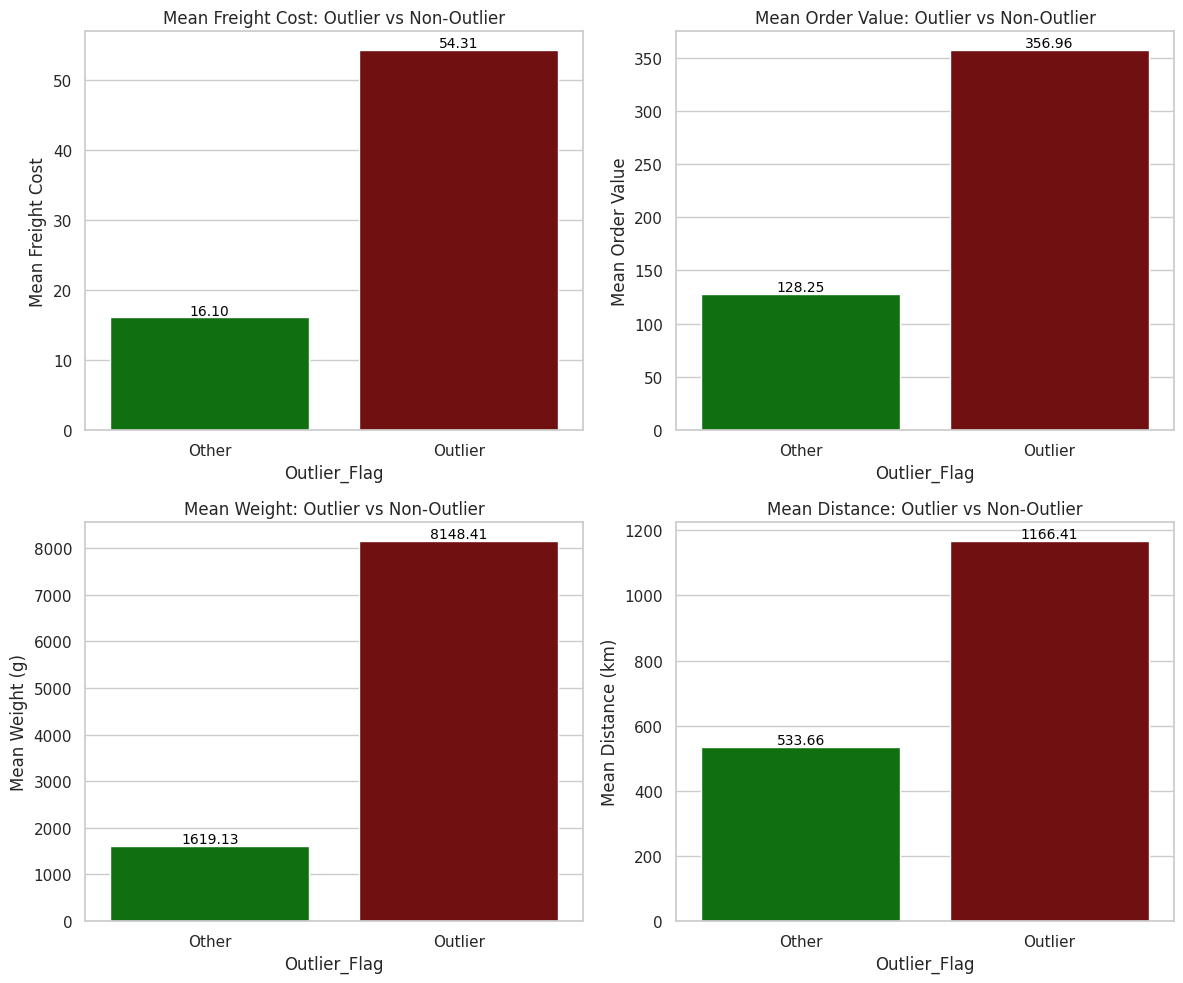

In [ ]:
#visualize the category_summary
#compare outliers vs. nonoutliers
#Create subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

colors = {'Other': 'green', 'Outlier': 'maroon'}

#add annotations
def add_annotations(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points',
                    fontsize=10, color='black')

#Bar plot for Freight Cost (Outlier vs Non-outlier)
sns.barplot(x='Outlier_Flag', y='Mean_Freight_Cost', data=category_summary, ax=ax[0, 0], palette=colors)
ax[0, 0].set_title('Mean Freight Cost: Outlier vs Non-Outlier')
ax[0, 0].set_ylabel('Mean Freight Cost')
add_annotations(ax[0][0])

#Bar plot for Mean Order Value (Outlier vs Non-outlier)
sns.barplot(x='Outlier_Flag', y='Mean_Order_Value', data=category_summary, ax=ax[0, 1], palette=colors)
ax[0, 1].set_title('Mean Order Value: Outlier vs Non-Outlier')
ax[0, 1].set_ylabel('Mean Order Value')
add_annotations(ax[0][1])

#Bar plot for Mean Weight (Outlier vs Non-outlier)
sns.barplot(x='Outlier_Flag', y='Mean_Weight', data=category_summary, ax=ax[1, 0], palette=colors)
ax[1, 0].set_title('Mean Weight: Outlier vs Non-Outlier')
ax[1, 0].set_ylabel('Mean Weight (g)')
add_annotations(ax[1][0])

#Bar plot for Mean Distance (Outlier vs Non-outlier)
sns.barplot(x='Outlier_Flag', y='Mean_distance', data=category_summary, ax=ax[1, 1],  palette=colors)
ax[1, 1].set_title('Mean Distance: Outlier vs Non-Outlier')
ax[1, 1].set_ylabel('Mean Distance (km)')
add_annotations(ax[1][1])

plt.tight_layout()
plt.show()


**Observation**

> Outliers tend to have significantly higher freight costs compared to non-outliers.

> Outliers have much higher average order values than non-outliers, suggesting a possible relationship between higher freight costs and high-value orders.

> The average weight of products in outlier orders is significantly higher, showing that carrying heavy products lead to the higher shipping costs.

> Outliers show longer delivery distances, indicating that shipping longer distances increases freight costs.

**Impact of Shipment Costs (Freight) on Total Revenue:**

By Freight_Percentage in the category_summary dataframe;

> For non-outliers, the freight cost represents about 12.55% of the order value.

> For outliers, the freight cost percentage is 15.21% to the order value.

>This suggests that higher freight costs, especially for outliers, reduce profit because of the increased share of shipment costs compared to order value (freight percentage).

>Strategies to reduce freight costs for outliers could improve overall profitability, especially for high-value and heavy products(average 8 kg). Negotiating with sellers and asking discounts on shipping prices for specially large orders in terms of value for money (more than 130)  will encourage customers to order more and becoming a loyal customer.

>By making deals with new sellers from different states, Olist can reduce the distance between the customer and the seller and naturally decrease freight costs.

# **Final Discussion**



>In the EDA section comprehensive analysis were provided such as variety of product categories, sales trend and logistic performance.

>Outliers in the delivery duration, peak periods of sales, sales growth based on timeline were identified.

>By analyzing delivery times, sales data, product categories I highligted spesific areas to improvement such as spesific regions with slow deliviries, high performing categories and regions to build a clear growt strategy.

>There were missing values or unmatching values between tables. For example unmatching orders limited a complete understanding of the customer base (2.68%)
There were missign order dates, this also restrict the analysis.

>I used various methods to detect outliers such as IQR, MAD, etc. Especially for delivery duratio, these outliers may indicate logistic problems.

>Also the sales data was limited and covers only from 2017 to 2018, Sales data showed positive growth, I believe more data provide much more reliable insights.

>The significant growth in November, I believe it is due to Black Friday, shows the importance of seasonal promotions. As I mentioned before, Olist needs to build new sales strategy to maintain sales after Black Friday to avoid the drop in sales afterward Black Friday.

>There are crucial problems with delivery times, To me, it is quiete long for e-commerce company.
I listed spesific regions to handle the logistic problems along with seller_id.

>96.9% of customers are one-time buyers, improvments in delivery speed could boost repeat sales.

>Additionally, to increase the customer loyalty, olist may offer promotions or use recommendation engines. Promoting bundles, cross-selling techniques can be developed based on the product pair list that I created in Question 4 chapter. Also the free shipping ratio is really low, offering free shipping options may catch the customer attention.

>I listed state pairs based on their performance, some of them showed inconsistency. Especially from SP to RJ. Focusing and optimizing these routes by negotiating better deals with sellers could enhance customer satisfaction and reduce the logistic based costs.

By following these recommendations I listed, Olist can enhance its overall  efficiency and continue to grow, increase profitability.

In [ ]:
%%shell
jupyter nbconvert --to html /content/GH1030814_FinalAssesment.ipynb




[NbConvertApp] Converting notebook /content/GH1030814_FinalAssesment.ipynb to html
[NbConvertApp] Writing 4026369 bytes to /content/GH1030814_FinalAssesment.html
